   # Tensorflow - Classification Problems
    
   * Binary Classifications
   * Multiclass Classifications
   * Multilabel Classifications

In [22]:
import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split 
from sklearn.datasets import make_circles
from sklearn.metrics import confusion_matrix

## Working with Non-Linear Datasets

In [2]:
# creating data
n_samples = 1000
X, y = make_circles(n_samples,
                   noise=0.025,
                   random_state=42)

# check features and labels
X, y

# (array([[ 0.75424625,  0.23148074],
#         [-0.75615888,  0.15325888],
#         [-0.81539193,  0.17328203],
#         ...,
#         [-0.13690036, -0.81001183],
#         [ 0.67036156, -0.76750154],
#         [ 0.28105665,  0.96382443]]),
#  array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
#         0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
#         0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
#         1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
#         1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
#         1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
#         0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
#         1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
#         0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
#         1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
#         0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
#         1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
#         0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
#         0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
#         1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
#         1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
#         1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
#         0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
#         0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
#         1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
#         0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
#         1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
#         1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
#         1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
#         1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
#         0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
#         1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
#         1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
#         1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
#         0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
#         0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
#         1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
#         1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
#         0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
#         1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
#         1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
#         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
#         1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
#         1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
#         0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
#         0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
#         0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
#         0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
#         1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
#         0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
#         0, 1, 0, 1, 0, 0, 0, 1, 0, 0]))

(array([[ 0.75725609,  0.22767948],
        [-0.76169053,  0.14940069],
        [-0.81177524,  0.16111279],
        ...,
        [-0.13906781, -0.80598149],
        [ 0.67272582, -0.76107939],
        [ 0.28171709,  0.96294066]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [3]:
# the dataset has two labels 1 & 0 for datapoints
# of the inner and outer circle generated by Scikit-Learn

circles = pd.DataFrame({"X0":X[:,0], "X1": X[:, 1], "label":y})
circles, X.shape, y.shape

# (           X0        X1  label
#  0    0.754246  0.231481      1
#  1   -0.756159  0.153259      1
#  2   -0.815392  0.173282      1
#  3   -0.393731  0.692883      1
#  4    0.442208 -0.896723      0
#  ..        ...       ...    ...
#  995  0.244054  0.944125      0
#  996 -0.978655 -0.272373      0
#  997 -0.136900 -0.810012      1
#  998  0.670362 -0.767502      0
#  999  0.281057  0.963824      0
 
#  [1000 rows x 3 columns],
#  (1000, 2),
#  (1000,))

(           X0        X1  label
 0    0.757256  0.227679      1
 1   -0.761691  0.149401      1
 2   -0.811775  0.161113      1
 3   -0.384880  0.698046      1
 4    0.441359 -0.897170      0
 ..        ...       ...    ...
 995  0.242795  0.948710      0
 996 -0.976976 -0.268426      0
 997 -0.139068 -0.805981      1
 998  0.672726 -0.761079      0
 999  0.281717  0.962941      0
 
 [1000 rows x 3 columns],
 (1000, 2),
 (1000,))

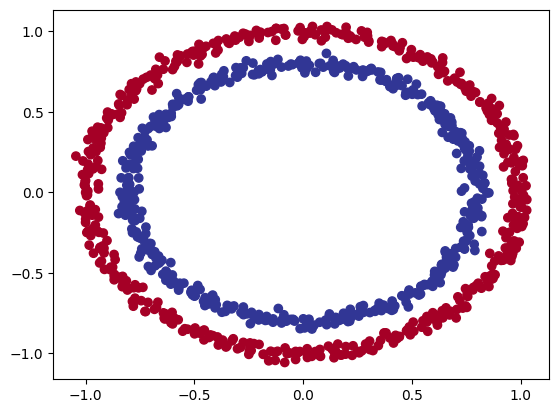

In [8]:
# we can visualize them in a scatter plot
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

![Tensorflow - Classification Problems](../assets/02_Tensorflow_Classifications_01.png)

## Building the Model

We can now build a neural network that allows us to do a binary classification between datapoints that belong to the blue and red circle.

In [40]:
tf.random.set_seed(42)

model_circles = tf.keras.Sequential([
    tf.keras.layers.Dense(1, name="input_layer")
], name="model_circles")

model_circles.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"])

# earlystop_callback = tf.keras.callbacks.EarlyStopping(
#   monitor='val_loss', min_delta=0.00001,
#   patience=100, restore_best_weights=True)

model_circles.fit(X, y, epochs=10) # callbacks=[earlystop_callback]
model_circles.evaluate(X, y)

# 32/32 [==============================] - 0s 1ms/step - loss: 0.7405 - accuracy: 0.5050
# [0.7405271530151367, 0.5049999952316284
#
# currently the model only predicts with a 45% accuracy... worse than pure guessing with a binary choice

Epoch 1/10
32/32 [==============================] - 0s 2ms/step - loss: 6.0180 - accuracy: 0.4870
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 5.7225 - accuracy: 0.4880
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 4.8668 - accuracy: 0.4770
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 4.5345 - accuracy: 0.4670
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 4.2597 - accuracy: 0.4730
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 3.9166 - accuracy: 0.4800
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 3.7446 - accuracy: 0.4740
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 3.5293 - accuracy: 0.4770
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 2.6574 - accuracy: 0.4780
Epoch 10/10
32/32 [==============================] - 0s 1ms/step - loss: 0.7830 - accuracy: 0.4950


[0.7829642295837402, 0.4950000047683716]

In [42]:
tf.random.set_seed(42)

# adding complexity + activation functions
model_circles_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(8, name="input_layer"),
    tf.keras.layers.Dense(16, name="dense_layer1"),
    tf.keras.layers.Dense(8, name="dense_layer2"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_circles_1")

# # adding complexity + activation functions
# model_circles_1 = tf.keras.Sequential([
#     tf.keras.layers.Dense(8, activation="relu", name="input_layer"),
#     tf.keras.layers.Dense(16, activation="relu", name="dense_layer1"),
#     tf.keras.layers.Dense(8, activation="relu", name="dense_layer2"),
#     tf.keras.layers.Dense(1, activation="relu", name="output_layer")
# ], name="model_circles_1")

model_circles_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"])

history_1 = model_circles_1.fit(X, y, epochs=150, verbose=0)
model_circles_1.evaluate(X, y)

# 32/32 [==============================] - 0s 1ms/step - loss: 0.7405 - accuracy: 0.5050
# [0.7405271530151367, 0.5049999952316284]

# not much better...

32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4740


[0.6931759119033813, 0.4740000069141388]

Text(0.5, 0, 'epochs')

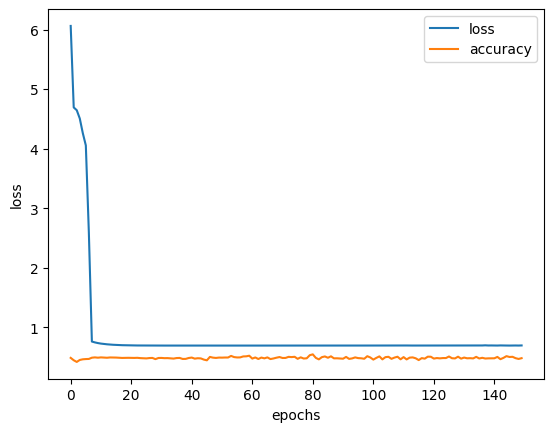

In [43]:
# history plot
pd.DataFrame(history_1.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

![Tensorflow - Classification Problems](../assets/02_Tensorflow_Classifications_02.png)

### Why it Fails

In [12]:
# visualize predictions
# https://cs231n.github.io/neural-networks-case-study/

def decision_boundray(model, X, y):
    
    # define axis boundries for features and labels
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    
    # create meshgrid within boundries (fresh data to run predictions on)
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
    
    # stack both mesh arrays together
    x_in = np.c_[xx.ravel(), yy.ravel()]
    
    # make predictions using the trained model
    y_pred = model.predict(x_in)
    
    # check for multiclass-classification 
    if len(y_pred[0]) > 1:
        # reshape predictions
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        y_pred = np.round(y_pred).reshape(xx.shape)
        
    # plot decision boundry
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 828us/step


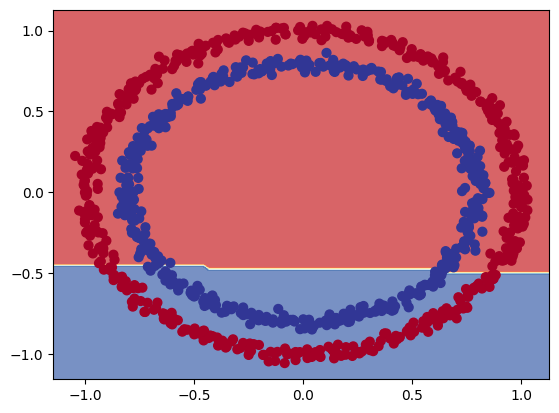

In [45]:
decision_boundray(model=model_circles_1, X=X, y=y)
# the model is trying to draw a straight line through the dataset to differentiate between both classes
# it then expands this line and tries to divide both classes - and fails with a circular dataset.

![Tensorflow - Classification Problems](../assets/02_Tensorflow_Classifications_03.png)

## Non Linearity

> Experimenting with the [Tensorflow Playground](https://playground.tensorflow.org/#activation=linear&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=1&seed=0.14938&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) to find a model that works for the non-linear classification problem.

A model useable for linear problems will remain stuck at an accuracy around 50% - purely guessing when predicting:

![Tensorflow - Classification Problems](../assets/02_Tensorflow_Classifications_04.png)

In [47]:
# rebuilding the model (above)
tf.random.set_seed(42)

model_circles_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="linear", name="input_layer")
])

model_circles_2.compile(loss="binary_crossentropy",
                       optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                       metrics=["accuracy"])

history_2 = model_circles_2.fit(X, y, epochs=150, verbose=0)
model_circles_2.evaluate(X, y)

# 32/32 [==============================] - 0s 1ms/step - loss: 0.7222 - accuracy: 0.4590
# [0.7222346067428589, 0.45899999141693115]

32/32 [==============================] - 0s 1ms/step - loss: 0.7222 - accuracy: 0.4590


[0.7222346067428589, 0.45899999141693115]

313/313 [==============================] - 0s 774us/step


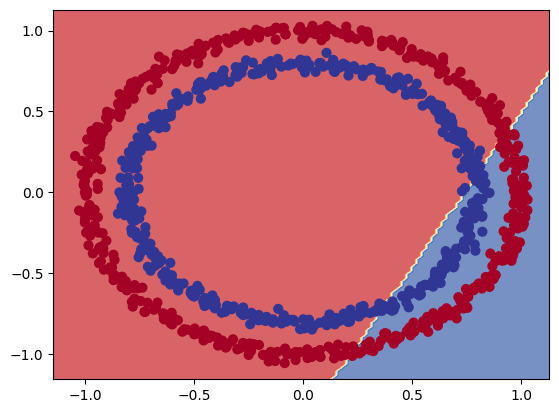

In [48]:
decision_boundray(model=model_circles_2, X=X, y=y)

![Tensorflow - Classification Problems](../assets/02_Tensorflow_Classifications_05.png)

I am starting to get a good separation with the following setup after approx. 2000 epochs:


![Tensorflow - Classification Problems](../assets/02_Tensorflow_Classifications_06.png)

In [52]:
# rebuilding the model (above)
tf.random.set_seed(42)

model_circles_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu")
])

model_circles_3.compile(loss="binary_crossentropy",
                       optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                       metrics=["accuracy"])

history_3 = model_circles_3.fit(X, y, epochs=2000, verbose=0)
model_circles_3.evaluate(X, y)

# 32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5000
# [0.693161129951477, 0.5]

32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6931561231613159, 0.5]

313/313 [==============================] - 0s 843us/step


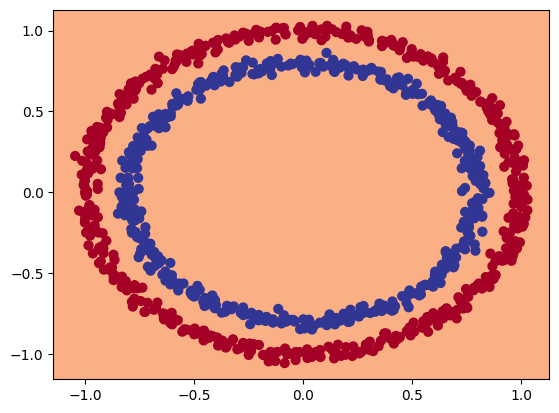

In [51]:
decision_boundray(model=model_circles_3, X=X, y=y)
# well, that isn't good...

In [55]:
# rebuilding the model (2nd attempt)
# adding an output layer with a single neuron for the binary classification

tf.random.set_seed(42)

model_circles_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu", name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
])

model_circles_4.compile(loss="binary_crossentropy",
                       optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                       metrics=["accuracy"])

history_4 = model_circles_4.fit(X, y, epochs=2000, verbose=0)
model_circles_4.evaluate(X, y)

# 32/32 [==============================] - 0s 2ms/step - loss: 0.3404 - accuracy: 0.8320
# [0.34036046266555786, 0.8320000171661377]

32/32 [==============================] - 0s 2ms/step - loss: 0.3404 - accuracy: 0.8320


[0.34036046266555786, 0.8320000171661377]

313/313 [==============================] - 0s 821us/step


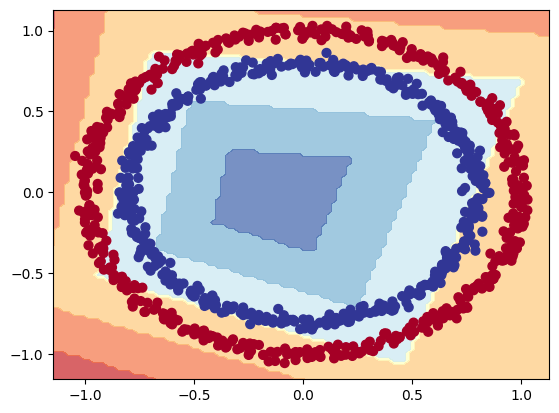

In [56]:
decision_boundray(model=model_circles_4, X=X, y=y)
# much better - but not as good as the example from the tf.playground

In [62]:
# rebuilding the model (2nd attempt)
# adding an "sigmoid" activation for the output layer

tf.random.set_seed(42)

model_circles_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu", name="input_layer"),
    tf.keras.layers.Dense(1, activation="sigmoid", name="output_layer")
])

model_circles_6.compile(loss="binary_crossentropy",
                       optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                       metrics=["accuracy"])

model_circles_6.fit(X, y, epochs=2000, verbose=0)
model_circles_6.evaluate(X, y)
32/32 [==============================] - 0s 1ms/step - loss: 0.0241 - accuracy: 1.0000
[0.0241051334887743, 1.0]

32/32 [==============================] - 0s 1ms/step - loss: 0.0241 - accuracy: 1.0000


[0.0241051334887743, 1.0]

In [ ]:
decision_boundray(model=model_circles_6, X=X, y=y)
# there you go...

![Tensorflow - Classification Problems](../assets/02_Tensorflow_Classifications_06b.png)

## Non-linear Activation Functions

2023-03-01 12:40:19.753878: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-01 12:40:20.025907: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-01 12:40:20.026215: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-01 12:40:20.028568: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  FMA
To enable them in other operations, rebuild TensorFlow w

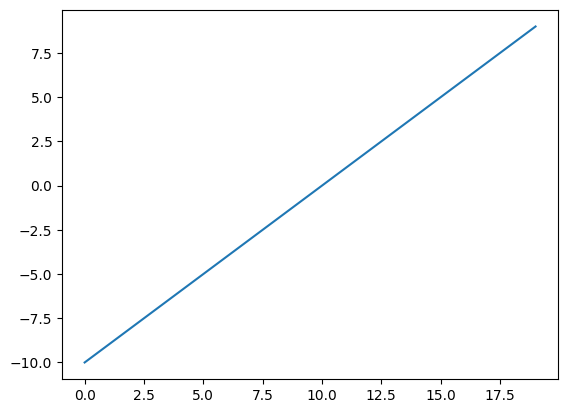

In [4]:
# create a input tensor
input_linear = tf.cast(tf.range(-10, 10), tf.float32)

# visualize the tensor
plt.plot(input_linear)

![Tensorflow - Classification Problems](../assets/02_Tensorflow_Classifications_07.png)

### Linear Activation Function

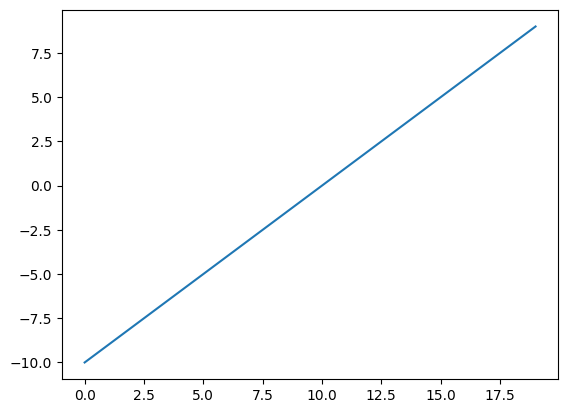

In [5]:
# replicating the linear activation function linear(x) = x
def linear(X):
    return X

linear(input_linear)

# <tf.Tensor: shape=(20,), dtype=float32, numpy=
# array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
#          1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
#       dtype=float32)>

plt.plot(linear(input_linear))

![Tensorflow - Classification Problems](../assets/02_Tensorflow_Classifications_08.png)

### Sigmoid Activation Function

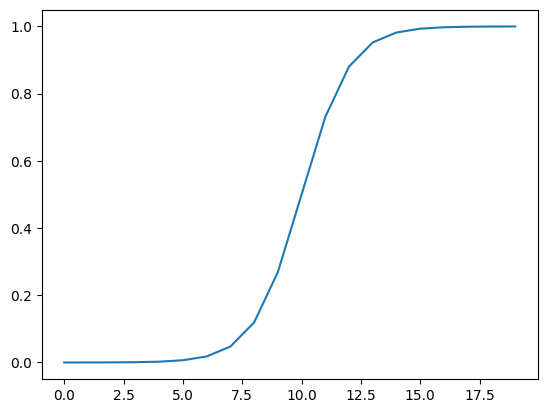

In [68]:
# replicating the sigmoid activation function sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(X):
    return 1/(1 + tf.exp(-X))

sigmoid(input_linear)

# <tf.Tensor: shape=(20,), dtype=float32, numpy=
# array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
#        2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
#        1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
#        8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
#        9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
#       dtype=float32)>

plt.plot(sigmoid(input_linear))

![Tensorflow - Classification Problems](../assets/02_Tensorflow_Classifications_09.png)

### reLU Activation Function

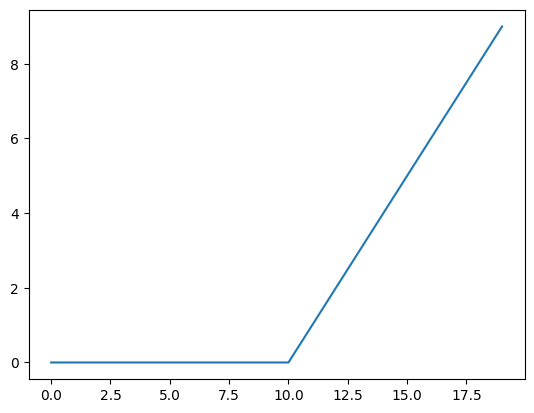

In [71]:
# replicating the reLU function f(x) = 0 for x<0 and x for x>0
def relu(X):
    return tf.maximum(0, X)

relu(input_linear)
# <tf.Tensor: shape=(20,), dtype=float32, numpy=
# array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
#        7., 8., 9.], dtype=float32)>

plt.plot(relu(input_linear))

![Tensorflow - Classification Problems](../assets/02_Tensorflow_Classifications_10.png)

## Training & Testing Datasplit

In the example above I used a single dataset to both train and test the model. Let's split this dataset so that we have a fresh testing dataset for the model.

In [6]:
# training and testing data split using scikit-learn
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

# check shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape
# ((800, 2), (200, 2), (800,), (200,))

((800, 2), (200, 2), (800,), (200,))

In [10]:
# rebuild the best model from above
# train on training set and eval on testing
tf.random.set_seed(42)

model_circles_lr10e_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu", name="input_layer"),
    tf.keras.layers.Dense(4, activation="relu", name="dense_layer"),
    tf.keras.layers.Dense(1, activation="sigmoid", name="output_layer")
])

model_circles_lr10e_3.compile(loss="binary_crossentropy",
                       optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                       metrics=["accuracy"])

history_lr10e_3 = model_circles_lr10e_3.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=2000)

# Epoch 2000/2000
# 25/25 [==============================] - 0s 4ms/step - loss: 2.2199e-04 - accuracy: 1.0000 - val_loss: 0.0131 - val_accuracy: 0.9950

Epoch 1/2000
25/25 [==============================] - 1s 8ms/step - loss: 0.7012 - accuracy: 0.4963 - val_loss: 0.6956 - val_accuracy: 0.4750
Epoch 2/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.6979 - accuracy: 0.4850 - val_loss: 0.6951 - val_accuracy: 0.4800
Epoch 3/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.6952 - accuracy: 0.4825 - val_loss: 0.6949 - val_accuracy: 0.4700
Epoch 4/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.4950 - val_loss: 0.6947 - val_accuracy: 0.4600
Epoch 5/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.4938 - val_loss: 0.6948 - val_accuracy: 0.4700
Epoch 6/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.5013 - val_loss: 0.6945 - val_accuracy: 0.4550
Epoch 7/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.6911 - accuracy: 0.5050 - val_loss: 0.6945 - val_accuracy: 0.4750
Epoch 

25/25 [==============================] - 0s 3ms/step - loss: 0.3061 - accuracy: 0.9937 - val_loss: 0.3285 - val_accuracy: 0.9900
Epoch 116/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.3006 - accuracy: 0.9912 - val_loss: 0.3231 - val_accuracy: 0.9900
Epoch 117/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.2951 - accuracy: 0.9912 - val_loss: 0.3184 - val_accuracy: 0.9900
Epoch 118/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.2892 - accuracy: 0.9925 - val_loss: 0.3139 - val_accuracy: 0.9950
Epoch 119/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.2846 - accuracy: 0.9925 - val_loss: 0.3090 - val_accuracy: 0.9950
Epoch 120/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.2787 - accuracy: 0.9937 - val_loss: 0.3041 - val_accuracy: 0.9900
Epoch 121/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.2735 - accuracy: 0.9925 - val_loss: 0.2998 - val_accuracy: 0.9950
Epoch 1

Epoch 172/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.1179 - accuracy: 0.9962 - val_loss: 0.1510 - val_accuracy: 0.9950
Epoch 173/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.1162 - accuracy: 0.9950 - val_loss: 0.1498 - val_accuracy: 0.9950
Epoch 174/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.1147 - accuracy: 0.9950 - val_loss: 0.1474 - val_accuracy: 0.9950
Epoch 175/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.1131 - accuracy: 0.9950 - val_loss: 0.1460 - val_accuracy: 0.9950
Epoch 176/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.1117 - accuracy: 0.9962 - val_loss: 0.1442 - val_accuracy: 0.9950
Epoch 177/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.1099 - accuracy: 0.9950 - val_loss: 0.1429 - val_accuracy: 0.9950
Epoch 178/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.1083 - accuracy: 0.9950 - val_loss: 0.1412 - val_accuracy:

Epoch 229/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0584 - accuracy: 1.0000 - val_loss: 0.0876 - val_accuracy: 0.9900
Epoch 230/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0574 - accuracy: 1.0000 - val_loss: 0.0869 - val_accuracy: 0.9900
Epoch 231/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0567 - accuracy: 1.0000 - val_loss: 0.0864 - val_accuracy: 0.9900
Epoch 232/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0560 - accuracy: 1.0000 - val_loss: 0.0860 - val_accuracy: 0.9900
Epoch 233/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0555 - accuracy: 1.0000 - val_loss: 0.0855 - val_accuracy: 0.9900
Epoch 234/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0551 - accuracy: 1.0000 - val_loss: 0.0843 - val_accuracy: 0.9900
Epoch 235/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0542 - accuracy: 1.0000 - val_loss: 0.0839 - val_accuracy:

Epoch 286/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0336 - accuracy: 1.0000 - val_loss: 0.0589 - val_accuracy: 0.9950
Epoch 287/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0335 - accuracy: 1.0000 - val_loss: 0.0590 - val_accuracy: 0.9900
Epoch 288/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0330 - accuracy: 1.0000 - val_loss: 0.0585 - val_accuracy: 0.9950
Epoch 289/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0330 - accuracy: 1.0000 - val_loss: 0.0578 - val_accuracy: 0.9950
Epoch 290/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0326 - accuracy: 1.0000 - val_loss: 0.0580 - val_accuracy: 0.9950
Epoch 291/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0324 - accuracy: 1.0000 - val_loss: 0.0575 - val_accuracy: 0.9950
Epoch 292/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0324 - accuracy: 1.0000 - val_loss: 0.0569 - val_accuracy:

Epoch 343/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0219 - accuracy: 1.0000 - val_loss: 0.0442 - val_accuracy: 0.9850
Epoch 344/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0217 - accuracy: 1.0000 - val_loss: 0.0439 - val_accuracy: 0.9900
Epoch 345/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0216 - accuracy: 1.0000 - val_loss: 0.0441 - val_accuracy: 0.9950
Epoch 346/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0214 - accuracy: 1.0000 - val_loss: 0.0436 - val_accuracy: 0.9950
Epoch 347/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0215 - accuracy: 1.0000 - val_loss: 0.0434 - val_accuracy: 0.9900
Epoch 348/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0212 - accuracy: 1.0000 - val_loss: 0.0432 - val_accuracy: 0.9950
Epoch 349/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0210 - accuracy: 1.0000 - val_loss: 0.0437 - val_accuracy:

Epoch 400/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0152 - accuracy: 1.0000 - val_loss: 0.0357 - val_accuracy: 0.9850
Epoch 401/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0152 - accuracy: 1.0000 - val_loss: 0.0349 - val_accuracy: 0.9950
Epoch 402/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0151 - accuracy: 1.0000 - val_loss: 0.0353 - val_accuracy: 0.9900
Epoch 403/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0150 - accuracy: 1.0000 - val_loss: 0.0358 - val_accuracy: 0.9900
Epoch 404/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0150 - accuracy: 1.0000 - val_loss: 0.0353 - val_accuracy: 0.9900
Epoch 405/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0150 - accuracy: 1.0000 - val_loss: 0.0351 - val_accuracy: 0.9900
Epoch 406/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0150 - accuracy: 1.0000 - val_loss: 0.0350 - val_accuracy:

Epoch 457/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0112 - accuracy: 1.0000 - val_loss: 0.0302 - val_accuracy: 0.9900
Epoch 458/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0110 - accuracy: 1.0000 - val_loss: 0.0303 - val_accuracy: 0.9850
Epoch 459/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0109 - accuracy: 1.0000 - val_loss: 0.0301 - val_accuracy: 0.9900
Epoch 460/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0110 - accuracy: 1.0000 - val_loss: 0.0299 - val_accuracy: 0.9850
Epoch 461/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0108 - accuracy: 1.0000 - val_loss: 0.0304 - val_accuracy: 0.9900
Epoch 462/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0108 - accuracy: 1.0000 - val_loss: 0.0296 - val_accuracy: 0.9900
Epoch 463/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0108 - accuracy: 1.0000 - val_loss: 0.0297 - val_accuracy:

Epoch 514/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.0272 - val_accuracy: 0.9900
Epoch 515/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 0.0266 - val_accuracy: 0.9900
Epoch 516/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0083 - accuracy: 1.0000 - val_loss: 0.0264 - val_accuracy: 0.9900
Epoch 517/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.0274 - val_accuracy: 0.9850
Epoch 518/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.0269 - val_accuracy: 0.9900
Epoch 519/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.0268 - val_accuracy: 0.9900
Epoch 520/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.0269 - val_accuracy:

Epoch 571/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0.0251 - val_accuracy: 0.9850
Epoch 572/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0.0246 - val_accuracy: 0.9900
Epoch 573/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.0259 - val_accuracy: 0.9900
Epoch 574/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.0247 - val_accuracy: 0.9850
Epoch 575/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0.0247 - val_accuracy: 0.9850
Epoch 576/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.0245 - val_accuracy: 0.9850
Epoch 577/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.0246 - val_accuracy:

Epoch 628/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.0227 - val_accuracy: 0.9900
Epoch 629/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.0229 - val_accuracy: 0.9850
Epoch 630/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0233 - val_accuracy: 0.9900
Epoch 631/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0225 - val_accuracy: 0.9900
Epoch 632/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.0239 - val_accuracy: 0.9900
Epoch 633/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.0235 - val_accuracy: 0.9850
Epoch 634/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0234 - val_accuracy:

Epoch 685/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0218 - val_accuracy: 0.9850
Epoch 686/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0222 - val_accuracy: 0.9900
Epoch 687/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0215 - val_accuracy: 0.9850
Epoch 688/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0232 - val_accuracy: 0.9900
Epoch 689/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0221 - val_accuracy: 0.9900
Epoch 690/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0219 - val_accuracy: 0.9900
Epoch 691/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0213 - val_accuracy:

Epoch 742/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0221 - val_accuracy: 0.9900
Epoch 743/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0218 - val_accuracy: 0.9900
Epoch 744/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0207 - val_accuracy: 0.9900
Epoch 745/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0210 - val_accuracy: 0.9850
Epoch 746/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0212 - val_accuracy: 0.9900
Epoch 747/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0214 - val_accuracy: 0.9900
Epoch 748/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0211 - val_accuracy:

Epoch 799/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0212 - val_accuracy: 0.9850
Epoch 800/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0214 - val_accuracy: 0.9900
Epoch 801/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0213 - val_accuracy: 0.9850
Epoch 802/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0207 - val_accuracy: 0.9900
Epoch 803/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0210 - val_accuracy: 0.9900
Epoch 804/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0216 - val_accuracy: 0.9850
Epoch 805/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0204 - val_accuracy:

Epoch 856/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0197 - val_accuracy: 0.9850
Epoch 857/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0198 - val_accuracy: 0.9900
Epoch 858/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0215 - val_accuracy: 0.9850
Epoch 859/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0197 - val_accuracy: 0.9850
Epoch 860/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0209 - val_accuracy: 0.9900
Epoch 861/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0201 - val_accuracy: 0.9850
Epoch 862/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0187 - val_accuracy:

Epoch 913/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0200 - val_accuracy: 0.9900
Epoch 914/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0206 - val_accuracy: 0.9900
Epoch 915/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0200 - val_accuracy: 0.9850
Epoch 916/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0205 - val_accuracy: 0.9900
Epoch 917/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0201 - val_accuracy: 0.9900
Epoch 918/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0205 - val_accuracy: 0.9900
Epoch 919/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0200 - val_accuracy:

Epoch 970/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0148 - val_accuracy: 0.9950
Epoch 971/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0141 - val_accuracy: 1.0000
Epoch 972/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0136 - val_accuracy: 0.9950
Epoch 973/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0140 - val_accuracy: 0.9950
Epoch 974/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0136 - val_accuracy: 1.0000
Epoch 975/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0142 - val_accuracy: 0.9950
Epoch 976/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0136 - val_accuracy:

Epoch 1027/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0138 - val_accuracy: 0.9950
Epoch 1028/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0146 - val_accuracy: 0.9900
Epoch 1029/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0138 - val_accuracy: 0.9950
Epoch 1030/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0136 - val_accuracy: 0.9950
Epoch 1031/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0137 - val_accuracy: 0.9900
Epoch 1032/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0129 - val_accuracy: 0.9950
Epoch 1033/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0134 - val_ac

25/25 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0138 - val_accuracy: 0.9900
Epoch 1140/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0136 - val_accuracy: 0.9950
Epoch 1141/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0133 - val_accuracy: 0.9900
Epoch 1142/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0134 - val_accuracy: 0.9900
Epoch 1143/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0135 - val_accuracy: 0.9900
Epoch 1144/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0129 - val_accuracy: 0.9950
Epoch 1145/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0129 - val_accuracy: 0.9950
E

25/25 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0120 - val_accuracy: 0.9950
Epoch 1252/2000
25/25 [==============================] - 0s 3ms/step - loss: 9.7906e-04 - accuracy: 1.0000 - val_loss: 0.0122 - val_accuracy: 0.9950
Epoch 1253/2000
25/25 [==============================] - 0s 3ms/step - loss: 9.6102e-04 - accuracy: 1.0000 - val_loss: 0.0126 - val_accuracy: 0.9950
Epoch 1254/2000
25/25 [==============================] - 0s 4ms/step - loss: 9.5672e-04 - accuracy: 1.0000 - val_loss: 0.0129 - val_accuracy: 0.9950
Epoch 1255/2000
25/25 [==============================] - 0s 3ms/step - loss: 9.7947e-04 - accuracy: 1.0000 - val_loss: 0.0118 - val_accuracy: 0.9950
Epoch 1256/2000
25/25 [==============================] - 0s 4ms/step - loss: 9.7111e-04 - accuracy: 1.0000 - val_loss: 0.0127 - val_accuracy: 0.9950
Epoch 1257/2000
25/25 [==============================] - 0s 4ms/step - loss: 9.1608e-04 - accuracy: 1.0000 - val_loss: 0.0122 

25/25 [==============================] - 0s 3ms/step - loss: 8.1763e-04 - accuracy: 1.0000 - val_loss: 0.0112 - val_accuracy: 0.9950
Epoch 1362/2000
25/25 [==============================] - 0s 3ms/step - loss: 7.9328e-04 - accuracy: 1.0000 - val_loss: 0.0109 - val_accuracy: 0.9950
Epoch 1363/2000
25/25 [==============================] - 0s 3ms/step - loss: 8.2582e-04 - accuracy: 1.0000 - val_loss: 0.0132 - val_accuracy: 0.9950
Epoch 1364/2000
25/25 [==============================] - 0s 3ms/step - loss: 9.3672e-04 - accuracy: 1.0000 - val_loss: 0.0120 - val_accuracy: 0.9950
Epoch 1365/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0119 - val_accuracy: 0.9950
Epoch 1366/2000
25/25 [==============================] - 0s 3ms/step - loss: 9.1070e-04 - accuracy: 1.0000 - val_loss: 0.0121 - val_accuracy: 0.9950
Epoch 1367/2000
25/25 [==============================] - 0s 3ms/step - loss: 7.5058e-04 - accuracy: 1.0000 - val_loss: 0.0113 

25/25 [==============================] - 0s 3ms/step - loss: 6.4545e-04 - accuracy: 1.0000 - val_loss: 0.0111 - val_accuracy: 0.9950
Epoch 1472/2000
25/25 [==============================] - 0s 3ms/step - loss: 6.0063e-04 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 0.9950
Epoch 1473/2000
25/25 [==============================] - 0s 3ms/step - loss: 6.3560e-04 - accuracy: 1.0000 - val_loss: 0.0121 - val_accuracy: 0.9950
Epoch 1474/2000
25/25 [==============================] - 0s 3ms/step - loss: 6.0580e-04 - accuracy: 1.0000 - val_loss: 0.0102 - val_accuracy: 0.9950
Epoch 1475/2000
25/25 [==============================] - 0s 3ms/step - loss: 6.3463e-04 - accuracy: 1.0000 - val_loss: 0.0103 - val_accuracy: 0.9950
Epoch 1476/2000
25/25 [==============================] - 0s 3ms/step - loss: 5.8819e-04 - accuracy: 1.0000 - val_loss: 0.0109 - val_accuracy: 0.9950
Epoch 1477/2000
25/25 [==============================] - 0s 3ms/step - loss: 6.0334e-04 - accuracy: 1.0000 - val_loss: 0.0

25/25 [==============================] - 0s 3ms/step - loss: 5.9295e-04 - accuracy: 1.0000 - val_loss: 0.0116 - val_accuracy: 0.9950
Epoch 1527/2000
25/25 [==============================] - 0s 3ms/step - loss: 5.3387e-04 - accuracy: 1.0000 - val_loss: 0.0101 - val_accuracy: 0.9950
Epoch 1528/2000
25/25 [==============================] - 0s 3ms/step - loss: 5.7430e-04 - accuracy: 1.0000 - val_loss: 0.0104 - val_accuracy: 0.9950
Epoch 1529/2000
25/25 [==============================] - 0s 3ms/step - loss: 6.4283e-04 - accuracy: 1.0000 - val_loss: 0.0115 - val_accuracy: 0.9950
Epoch 1530/2000
25/25 [==============================] - 0s 3ms/step - loss: 5.9633e-04 - accuracy: 1.0000 - val_loss: 0.0110 - val_accuracy: 0.9950
Epoch 1531/2000
25/25 [==============================] - 0s 3ms/step - loss: 6.3122e-04 - accuracy: 1.0000 - val_loss: 0.0122 - val_accuracy: 0.9950
Epoch 1532/2000
25/25 [==============================] - 0s 3ms/step - loss: 5.9071e-04 - accuracy: 1.0000 - val_loss: 0.0

25/25 [==============================] - 0s 3ms/step - loss: 4.9969e-04 - accuracy: 1.0000 - val_loss: 0.0102 - val_accuracy: 0.9950
Epoch 1582/2000
25/25 [==============================] - 0s 3ms/step - loss: 5.1058e-04 - accuracy: 1.0000 - val_loss: 0.0099 - val_accuracy: 0.9950
Epoch 1583/2000
25/25 [==============================] - 0s 3ms/step - loss: 4.9497e-04 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 0.9950
Epoch 1584/2000
25/25 [==============================] - 0s 3ms/step - loss: 5.1426e-04 - accuracy: 1.0000 - val_loss: 0.0104 - val_accuracy: 0.9950
Epoch 1585/2000
25/25 [==============================] - 0s 3ms/step - loss: 4.9693e-04 - accuracy: 1.0000 - val_loss: 0.0103 - val_accuracy: 0.9950
Epoch 1586/2000
25/25 [==============================] - 0s 3ms/step - loss: 4.8965e-04 - accuracy: 1.0000 - val_loss: 0.0109 - val_accuracy: 0.9950
Epoch 1587/2000
25/25 [==============================] - 0s 3ms/step - loss: 5.1752e-04 - accuracy: 1.0000 - val_loss: 0.0

25/25 [==============================] - 0s 3ms/step - loss: 4.4641e-04 - accuracy: 1.0000 - val_loss: 0.0100 - val_accuracy: 0.9950
Epoch 1637/2000
25/25 [==============================] - 0s 3ms/step - loss: 4.6968e-04 - accuracy: 1.0000 - val_loss: 0.0113 - val_accuracy: 0.9950
Epoch 1638/2000
25/25 [==============================] - 0s 3ms/step - loss: 4.8008e-04 - accuracy: 1.0000 - val_loss: 0.0094 - val_accuracy: 0.9950
Epoch 1639/2000
25/25 [==============================] - 0s 3ms/step - loss: 5.2864e-04 - accuracy: 1.0000 - val_loss: 0.0124 - val_accuracy: 0.9950
Epoch 1640/2000
25/25 [==============================] - 0s 3ms/step - loss: 4.8211e-04 - accuracy: 1.0000 - val_loss: 0.0110 - val_accuracy: 0.9950
Epoch 1641/2000
25/25 [==============================] - 0s 4ms/step - loss: 4.5734e-04 - accuracy: 1.0000 - val_loss: 0.0114 - val_accuracy: 0.9950
Epoch 1642/2000
25/25 [==============================] - 0s 4ms/step - loss: 5.0454e-04 - accuracy: 1.0000 - val_loss: 0.0

25/25 [==============================] - 0s 3ms/step - loss: 4.2200e-04 - accuracy: 1.0000 - val_loss: 0.0107 - val_accuracy: 0.9950
Epoch 1692/2000
25/25 [==============================] - 0s 3ms/step - loss: 4.2967e-04 - accuracy: 1.0000 - val_loss: 0.0103 - val_accuracy: 0.9950
Epoch 1693/2000
25/25 [==============================] - 0s 3ms/step - loss: 3.9249e-04 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 0.9950
Epoch 1694/2000
25/25 [==============================] - 0s 3ms/step - loss: 3.7702e-04 - accuracy: 1.0000 - val_loss: 0.0109 - val_accuracy: 0.9950
Epoch 1695/2000
25/25 [==============================] - 0s 3ms/step - loss: 3.9792e-04 - accuracy: 1.0000 - val_loss: 0.0104 - val_accuracy: 0.9950
Epoch 1696/2000
25/25 [==============================] - 0s 3ms/step - loss: 4.6129e-04 - accuracy: 1.0000 - val_loss: 0.0101 - val_accuracy: 0.9950
Epoch 1697/2000
25/25 [==============================] - 0s 3ms/step - loss: 3.9737e-04 - accuracy: 1.0000 - val_loss: 0.0

25/25 [==============================] - 0s 4ms/step - loss: 3.6579e-04 - accuracy: 1.0000 - val_loss: 0.0101 - val_accuracy: 0.9950
Epoch 1747/2000
25/25 [==============================] - 0s 4ms/step - loss: 4.6092e-04 - accuracy: 1.0000 - val_loss: 0.0092 - val_accuracy: 0.9950
Epoch 1748/2000
25/25 [==============================] - 0s 4ms/step - loss: 4.6189e-04 - accuracy: 1.0000 - val_loss: 0.0103 - val_accuracy: 0.9950
Epoch 1749/2000
25/25 [==============================] - 0s 4ms/step - loss: 3.8654e-04 - accuracy: 1.0000 - val_loss: 0.0115 - val_accuracy: 0.9950
Epoch 1750/2000
25/25 [==============================] - 0s 4ms/step - loss: 3.7767e-04 - accuracy: 1.0000 - val_loss: 0.0114 - val_accuracy: 0.9950
Epoch 1751/2000
25/25 [==============================] - 0s 4ms/step - loss: 4.0749e-04 - accuracy: 1.0000 - val_loss: 0.0115 - val_accuracy: 0.9950
Epoch 1752/2000
25/25 [==============================] - 0s 4ms/step - loss: 3.3462e-04 - accuracy: 1.0000 - val_loss: 0.0

25/25 [==============================] - 0s 4ms/step - loss: 3.5949e-04 - accuracy: 1.0000 - val_loss: 0.0107 - val_accuracy: 0.9950
Epoch 1802/2000
25/25 [==============================] - 0s 3ms/step - loss: 3.4538e-04 - accuracy: 1.0000 - val_loss: 0.0099 - val_accuracy: 0.9950
Epoch 1803/2000
25/25 [==============================] - 0s 3ms/step - loss: 3.3605e-04 - accuracy: 1.0000 - val_loss: 0.0104 - val_accuracy: 0.9950
Epoch 1804/2000
25/25 [==============================] - 0s 3ms/step - loss: 3.2175e-04 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 0.9950
Epoch 1805/2000
25/25 [==============================] - 0s 3ms/step - loss: 3.3095e-04 - accuracy: 1.0000 - val_loss: 0.0101 - val_accuracy: 0.9950
Epoch 1806/2000
25/25 [==============================] - 0s 4ms/step - loss: 3.1998e-04 - accuracy: 1.0000 - val_loss: 0.0119 - val_accuracy: 0.9950
Epoch 1807/2000
25/25 [==============================] - 0s 4ms/step - loss: 3.5921e-04 - accuracy: 1.0000 - val_loss: 0.0

25/25 [==============================] - 0s 3ms/step - loss: 3.1253e-04 - accuracy: 1.0000 - val_loss: 0.0100 - val_accuracy: 0.9950
Epoch 1857/2000
25/25 [==============================] - 0s 3ms/step - loss: 3.2884e-04 - accuracy: 1.0000 - val_loss: 0.0101 - val_accuracy: 0.9950
Epoch 1858/2000
25/25 [==============================] - 0s 3ms/step - loss: 3.3544e-04 - accuracy: 1.0000 - val_loss: 0.0115 - val_accuracy: 0.9950
Epoch 1859/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.6424e-04 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 0.9950
Epoch 1860/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.8432e-04 - accuracy: 1.0000 - val_loss: 0.0107 - val_accuracy: 0.9950
Epoch 1861/2000
25/25 [==============================] - 0s 3ms/step - loss: 3.0693e-04 - accuracy: 1.0000 - val_loss: 0.0107 - val_accuracy: 0.9950
Epoch 1862/2000
25/25 [==============================] - 0s 3ms/step - loss: 3.4580e-04 - accuracy: 1.0000 - val_loss: 0.0

25/25 [==============================] - 0s 3ms/step - loss: 2.9103e-04 - accuracy: 1.0000 - val_loss: 0.0106 - val_accuracy: 0.9950
Epoch 1912/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.8205e-04 - accuracy: 1.0000 - val_loss: 0.0127 - val_accuracy: 0.9950
Epoch 1913/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.6533e-04 - accuracy: 1.0000 - val_loss: 0.0109 - val_accuracy: 0.9950
Epoch 1914/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.9340e-04 - accuracy: 1.0000 - val_loss: 0.0112 - val_accuracy: 0.9950
Epoch 1915/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.8342e-04 - accuracy: 1.0000 - val_loss: 0.0115 - val_accuracy: 0.9950
Epoch 1916/2000
25/25 [==============================] - 0s 3ms/step - loss: 3.0302e-04 - accuracy: 1.0000 - val_loss: 0.0093 - val_accuracy: 0.9950
Epoch 1917/2000
25/25 [==============================] - 0s 4ms/step - loss: 2.6717e-04 - accuracy: 1.0000 - val_loss: 0.0

25/25 [==============================] - 0s 3ms/step - loss: 2.5439e-04 - accuracy: 1.0000 - val_loss: 0.0117 - val_accuracy: 0.9950
Epoch 1967/2000
25/25 [==============================] - 0s 4ms/step - loss: 2.6321e-04 - accuracy: 1.0000 - val_loss: 0.0103 - val_accuracy: 0.9950
Epoch 1968/2000
25/25 [==============================] - 0s 4ms/step - loss: 2.1568e-04 - accuracy: 1.0000 - val_loss: 0.0107 - val_accuracy: 0.9950
Epoch 1969/2000
25/25 [==============================] - 0s 4ms/step - loss: 2.1730e-04 - accuracy: 1.0000 - val_loss: 0.0111 - val_accuracy: 0.9950
Epoch 1970/2000
25/25 [==============================] - 0s 4ms/step - loss: 2.1215e-04 - accuracy: 1.0000 - val_loss: 0.0110 - val_accuracy: 0.9950
Epoch 1971/2000
25/25 [==============================] - 0s 4ms/step - loss: 2.1853e-04 - accuracy: 1.0000 - val_loss: 0.0115 - val_accuracy: 0.9950
Epoch 1972/2000
25/25 [==============================] - 0s 4ms/step - loss: 2.2478e-04 - accuracy: 1.0000 - val_loss: 0.0

313/313 [==============================] - 0s 911us/step


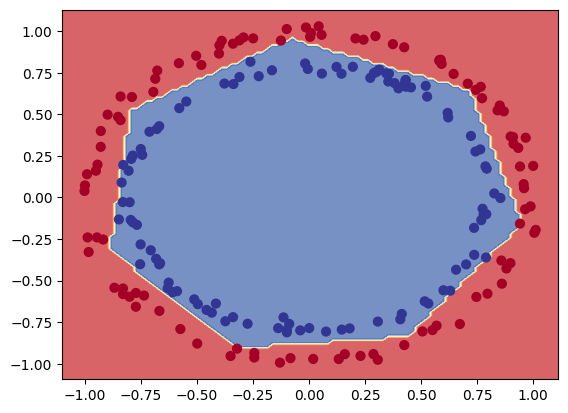

In [13]:
decision_boundray(model=model_circles_lr10e_3, X=X_test, y=y_test)

![Tensorflow - Classification Problems](../assets/02_Tensorflow_Classifications_11.png)

## Learning Rate

In the example above it took __256__ cycles to get to an __val_accuracy: 0.9000__:

```
25/25 [==============================] - 0s 3ms/step - loss: 0.2355 - accuracy: 0.9100 - val_loss: 0.2647 - val_accuracy: 0.8950
Epoch 255/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.2338 - accuracy: 0.9137 - val_loss: 0.2636 - val_accuracy: 0.8900
Epoch 256/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.2312 - accuracy: 0.9162 - val_loss: 0.2595 - val_accuracy: 0.9000
Epoch 257/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.2255 - accuracy: 0.9162 - val_loss: 0.2390 - val_accuracy: 0.9000
Epoch 258/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.2030 - accuracy: 0.9438 - val_loss: 0.2118 - val_accuracy: 0.9600
```

By increasing the learning rate we allow Tensorflow to make bigger changes to the model weights after each epoch. This should increase the initial speed with which the model is moving towards the optimum:

In [14]:
tf.random.set_seed(42)

model_circles_lr10e_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu", name="input_layer"),
    tf.keras.layers.Dense(4, activation="relu", name="dense_layer"),
    tf.keras.layers.Dense(1, activation="sigmoid", name="output_layer")
])

model_circles_lr10e_2.compile(loss="binary_crossentropy",
                       optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                       metrics=["accuracy"])

history_lr10e_2 = model_circles_lr10e_2.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=2000)

# Epoch 2000/2000
# 25/25 [==============================] - 0s 3ms/step - loss: 4.2108e-04 - accuracy: 1.0000 - val_loss: 0.0158 - val_accuracy: 0.9900

Epoch 1/2000
25/25 [==============================] - 1s 8ms/step - loss: 0.6922 - accuracy: 0.4925 - val_loss: 0.6890 - val_accuracy: 0.5250
Epoch 2/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.6900 - accuracy: 0.5175 - val_loss: 0.6873 - val_accuracy: 0.5250
Epoch 3/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.6876 - accuracy: 0.5175 - val_loss: 0.6845 - val_accuracy: 0.5350
Epoch 4/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.6862 - accuracy: 0.5288 - val_loss: 0.6808 - val_accuracy: 0.5250
Epoch 5/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.6818 - accuracy: 0.5325 - val_loss: 0.6770 - val_accuracy: 0.5400
Epoch 6/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.6736 - accuracy: 0.5600 - val_loss: 0.6696 - val_accuracy: 0.6200
Epoch 7/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.6585 - accuracy: 0.5825 - val_loss: 0.6405 - val_accuracy: 0.6150
Epoch 

25/25 [==============================] - 0s 3ms/step - loss: 0.0164 - accuracy: 0.9987 - val_loss: 0.0374 - val_accuracy: 0.9850
Epoch 116/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0166 - accuracy: 0.9987 - val_loss: 0.0407 - val_accuracy: 0.9800
Epoch 117/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0175 - accuracy: 0.9975 - val_loss: 0.0323 - val_accuracy: 0.9850
Epoch 118/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0162 - accuracy: 1.0000 - val_loss: 0.0376 - val_accuracy: 0.9800
Epoch 119/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0163 - accuracy: 1.0000 - val_loss: 0.0457 - val_accuracy: 0.9800
Epoch 120/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0195 - accuracy: 0.9962 - val_loss: 0.0417 - val_accuracy: 0.9850
Epoch 121/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0166 - accuracy: 0.9975 - val_loss: 0.0316 - val_accuracy: 0.9900
Epoch 1

Epoch 172/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0101 - accuracy: 0.9975 - val_loss: 0.0290 - val_accuracy: 0.9900
Epoch 173/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0088 - accuracy: 0.9987 - val_loss: 0.0280 - val_accuracy: 0.9850
Epoch 174/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0093 - accuracy: 0.9987 - val_loss: 0.0310 - val_accuracy: 0.9900
Epoch 175/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0103 - accuracy: 0.9987 - val_loss: 0.0326 - val_accuracy: 0.9850
Epoch 176/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0110 - accuracy: 0.9987 - val_loss: 0.0371 - val_accuracy: 0.9850
Epoch 177/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0121 - accuracy: 0.9962 - val_loss: 0.0267 - val_accuracy: 0.9950
Epoch 178/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0157 - accuracy: 0.9937 - val_loss: 0.0682 - val_accuracy:

Epoch 229/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0141 - accuracy: 0.9950 - val_loss: 0.0501 - val_accuracy: 0.9800
Epoch 230/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0375 - accuracy: 0.9850 - val_loss: 0.0251 - val_accuracy: 0.9950
Epoch 231/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0153 - accuracy: 0.9962 - val_loss: 0.0312 - val_accuracy: 0.9900
Epoch 232/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0104 - accuracy: 0.9975 - val_loss: 0.0236 - val_accuracy: 0.9900
Epoch 233/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.0249 - val_accuracy: 0.9900
Epoch 234/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.0226 - val_accuracy: 0.9900
Epoch 235/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.0224 - val_accuracy:

Epoch 286/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.0221 - val_accuracy: 0.9900
Epoch 287/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0193 - val_accuracy: 0.9900
Epoch 288/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0223 - val_accuracy: 0.9900
Epoch 289/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0179 - val_accuracy: 0.9950
Epoch 290/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.0212 - val_accuracy: 0.9900
Epoch 291/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.0232 - val_accuracy: 0.9950
Epoch 292/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0117 - accuracy: 0.9975 - val_loss: 0.0919 - val_accuracy:

Epoch 343/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0182 - val_accuracy: 0.9900
Epoch 344/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0202 - val_accuracy: 0.9900
Epoch 345/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0204 - val_accuracy: 0.9900
Epoch 346/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0236 - val_accuracy: 0.9900
Epoch 347/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0183 - val_accuracy: 0.9900
Epoch 348/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0183 - val_accuracy: 0.9900
Epoch 349/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0258 - val_accuracy:

Epoch 400/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.1212 - accuracy: 0.9675 - val_loss: 0.2495 - val_accuracy: 0.9350
Epoch 401/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0203 - accuracy: 0.9912 - val_loss: 0.1089 - val_accuracy: 0.9600
Epoch 402/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0290 - accuracy: 0.9925 - val_loss: 0.0486 - val_accuracy: 0.9850
Epoch 403/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0121 - accuracy: 0.9975 - val_loss: 0.0198 - val_accuracy: 0.9950
Epoch 404/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0069 - accuracy: 0.9987 - val_loss: 0.0390 - val_accuracy: 0.9850
Epoch 405/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.0241 - val_accuracy: 0.9850
Epoch 406/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0226 - val_accuracy:

Epoch 457/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0233 - val_accuracy: 0.9900
Epoch 458/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0236 - val_accuracy: 0.9900
Epoch 459/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0236 - val_accuracy: 0.9850
Epoch 460/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0029 - accuracy: 0.9987 - val_loss: 0.0283 - val_accuracy: 0.9900
Epoch 461/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0222 - val_accuracy: 0.9900
Epoch 462/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0215 - val_accuracy: 0.9900
Epoch 463/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0250 - val_accuracy:

Epoch 514/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0266 - val_accuracy: 0.9900
Epoch 515/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0251 - val_accuracy: 0.9850
Epoch 516/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 0.9987 - val_loss: 0.0541 - val_accuracy: 0.9800
Epoch 517/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0342 - val_accuracy: 0.9850
Epoch 518/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0245 - val_accuracy: 0.9850
Epoch 519/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0248 - val_accuracy: 0.9900
Epoch 520/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0293 - val_accuracy:

Epoch 571/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.1200 - accuracy: 0.9650 - val_loss: 0.0685 - val_accuracy: 0.9650
Epoch 572/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0114 - accuracy: 0.9925 - val_loss: 0.0326 - val_accuracy: 0.9850
Epoch 573/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0045 - accuracy: 0.9987 - val_loss: 0.0207 - val_accuracy: 0.9900
Epoch 574/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0219 - val_accuracy: 0.9900
Epoch 575/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0231 - val_accuracy: 0.9900
Epoch 576/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0225 - val_accuracy: 0.9900
Epoch 577/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0219 - val_accuracy:

Epoch 628/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0228 - val_accuracy: 0.9900
Epoch 629/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0207 - val_accuracy: 0.9850
Epoch 630/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0199 - val_accuracy: 0.9900
Epoch 631/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0211 - val_accuracy: 0.9900
Epoch 632/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0191 - val_accuracy: 0.9900
Epoch 633/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0199 - val_accuracy: 0.9900
Epoch 634/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0220 - val_accuracy:

Epoch 685/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0223 - val_accuracy: 0.9900
Epoch 686/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0221 - val_accuracy: 0.9900
Epoch 687/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0217 - val_accuracy: 0.9850
Epoch 688/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0204 - val_accuracy: 0.9900
Epoch 689/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0212 - val_accuracy: 0.9800
Epoch 690/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0208 - val_accuracy: 0.9900
Epoch 691/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0226 - val_accuracy:

Epoch 742/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0182 - val_accuracy: 0.9950
Epoch 743/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0181 - val_accuracy: 0.9850
Epoch 744/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0170 - val_accuracy: 0.9950
Epoch 745/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0193 - val_accuracy: 0.9900
Epoch 746/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0197 - val_accuracy: 0.9850
Epoch 747/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0175 - val_accuracy: 0.9900
Epoch 748/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0191 - val_accuracy:

Epoch 799/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0250 - val_accuracy: 0.9850
Epoch 800/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0211 - val_accuracy: 0.9850
Epoch 801/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0216 - val_accuracy: 0.9850
Epoch 802/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0241 - val_accuracy: 0.9850
Epoch 803/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0191 - val_accuracy: 0.9900
Epoch 804/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0236 - val_accuracy: 0.9850
Epoch 805/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0192 - val_accuracy:

Epoch 856/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0144 - val_accuracy: 0.9950
Epoch 857/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0142 - val_accuracy: 0.9950
Epoch 858/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0141 - val_accuracy: 0.9950
Epoch 859/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0149 - val_accuracy: 0.9950
Epoch 860/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0156 - val_accuracy: 0.9950
Epoch 861/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0145 - val_accuracy: 0.9950
Epoch 862/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0156 - val_accuracy:

Epoch 913/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0172 - val_accuracy: 0.9900
Epoch 914/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0174 - val_accuracy: 0.9950
Epoch 915/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0174 - val_accuracy: 0.9950
Epoch 916/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0173 - val_accuracy: 0.9900
Epoch 917/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0178 - val_accuracy: 0.9950
Epoch 918/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0173 - val_accuracy: 0.9900
Epoch 919/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0181 - val_accuracy:

Epoch 970/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0251 - val_accuracy: 0.9900
Epoch 971/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0214 - val_accuracy: 0.9900
Epoch 972/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0216 - val_accuracy: 0.9850
Epoch 973/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0236 - val_accuracy: 0.9850
Epoch 974/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0186 - val_accuracy: 0.9850
Epoch 975/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0216 - val_accuracy: 0.9900
Epoch 976/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0240 - val_accuracy:

Epoch 1082/2000
25/25 [==============================] - 0s 3ms/step - loss: 8.6821e-04 - accuracy: 1.0000 - val_loss: 0.0146 - val_accuracy: 0.9950
Epoch 1083/2000
25/25 [==============================] - 0s 3ms/step - loss: 7.9274e-04 - accuracy: 1.0000 - val_loss: 0.0157 - val_accuracy: 0.9900
Epoch 1084/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0156 - val_accuracy: 0.9850
Epoch 1085/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0223 - val_accuracy: 0.9900
Epoch 1086/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0190 - val_accuracy: 0.9900
Epoch 1087/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0176 - val_accuracy: 0.9900
Epoch 1088/2000
25/25 [==============================] - 0s 3ms/step - loss: 9.1341e-04 - accuracy: 1.0000 - val_loss: 0.0

Epoch 1138/2000
25/25 [==============================] - 0s 4ms/step - loss: 8.5037e-04 - accuracy: 1.0000 - val_loss: 0.0128 - val_accuracy: 0.9950
Epoch 1139/2000
25/25 [==============================] - 0s 4ms/step - loss: 8.6317e-04 - accuracy: 1.0000 - val_loss: 0.0129 - val_accuracy: 0.9900
Epoch 1140/2000
25/25 [==============================] - 0s 3ms/step - loss: 8.8866e-04 - accuracy: 1.0000 - val_loss: 0.0129 - val_accuracy: 0.9950
Epoch 1141/2000
25/25 [==============================] - 0s 3ms/step - loss: 8.9873e-04 - accuracy: 1.0000 - val_loss: 0.0130 - val_accuracy: 0.9900
Epoch 1142/2000
25/25 [==============================] - 0s 3ms/step - loss: 8.4149e-04 - accuracy: 1.0000 - val_loss: 0.0132 - val_accuracy: 0.9950
Epoch 1143/2000
25/25 [==============================] - 0s 3ms/step - loss: 8.6449e-04 - accuracy: 1.0000 - val_loss: 0.0130 - val_accuracy: 0.9950
Epoch 1144/2000
25/25 [==============================] - 0s 4ms/step - loss: 8.6256e-04 - accuracy: 1.0000

25/25 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0268 - val_accuracy: 0.9900
Epoch 1194/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0202 - val_accuracy: 0.9900
Epoch 1195/2000
25/25 [==============================] - 0s 3ms/step - loss: 9.2400e-04 - accuracy: 1.0000 - val_loss: 0.0148 - val_accuracy: 0.9900
Epoch 1196/2000
25/25 [==============================] - 0s 5ms/step - loss: 7.3821e-04 - accuracy: 1.0000 - val_loss: 0.0151 - val_accuracy: 0.9950
Epoch 1197/2000
25/25 [==============================] - 0s 5ms/step - loss: 7.0456e-04 - accuracy: 1.0000 - val_loss: 0.0162 - val_accuracy: 0.9900
Epoch 1198/2000
25/25 [==============================] - 0s 5ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0156 - val_accuracy: 0.9950
Epoch 1199/2000
25/25 [==============================] - 0s 5ms/step - loss: 6.7425e-04 - accuracy: 1.0000 - val_loss: 0.0155 - val_ac

25/25 [==============================] - 0s 3ms/step - loss: 6.8465e-04 - accuracy: 1.0000 - val_loss: 0.0122 - val_accuracy: 0.9950
Epoch 1304/2000
25/25 [==============================] - 0s 3ms/step - loss: 7.8910e-04 - accuracy: 1.0000 - val_loss: 0.0125 - val_accuracy: 0.9950
Epoch 1305/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0125 - val_accuracy: 0.9950
Epoch 1306/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0127 - val_accuracy: 0.9950
Epoch 1307/2000
25/25 [==============================] - 0s 3ms/step - loss: 9.3498e-04 - accuracy: 1.0000 - val_loss: 0.0132 - val_accuracy: 0.9950
Epoch 1308/2000
25/25 [==============================] - 0s 4ms/step - loss: 7.3183e-04 - accuracy: 1.0000 - val_loss: 0.0124 - val_accuracy: 0.9950
Epoch 1309/2000
25/25 [==============================] - 0s 4ms/step - loss: 6.9370e-04 - accuracy: 1.0000 - val_loss: 0.0129 - va

25/25 [==============================] - 0s 4ms/step - loss: 7.4662e-04 - accuracy: 1.0000 - val_loss: 0.0196 - val_accuracy: 0.9900
Epoch 1414/2000
25/25 [==============================] - 0s 4ms/step - loss: 7.9352e-04 - accuracy: 1.0000 - val_loss: 0.0167 - val_accuracy: 0.9900
Epoch 1415/2000
25/25 [==============================] - 0s 3ms/step - loss: 7.5162e-04 - accuracy: 1.0000 - val_loss: 0.0205 - val_accuracy: 0.9850
Epoch 1416/2000
25/25 [==============================] - 0s 3ms/step - loss: 7.4239e-04 - accuracy: 1.0000 - val_loss: 0.0192 - val_accuracy: 0.9850
Epoch 1417/2000
25/25 [==============================] - 0s 3ms/step - loss: 8.0063e-04 - accuracy: 1.0000 - val_loss: 0.0189 - val_accuracy: 0.9900
Epoch 1418/2000
25/25 [==============================] - 0s 3ms/step - loss: 8.2155e-04 - accuracy: 1.0000 - val_loss: 0.0200 - val_accuracy: 0.9900
Epoch 1419/2000
25/25 [==============================] - 0s 3ms/step - loss: 7.5765e-04 - accuracy: 1.0000 - val_loss: 0.0

25/25 [==============================] - 0s 4ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0208 - val_accuracy: 0.9900
Epoch 1524/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0133 - val_accuracy: 0.9900
Epoch 1525/2000
25/25 [==============================] - 0s 3ms/step - loss: 8.7356e-04 - accuracy: 1.0000 - val_loss: 0.0152 - val_accuracy: 0.9900
Epoch 1526/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0184 - val_accuracy: 0.9900
Epoch 1527/2000
25/25 [==============================] - 0s 3ms/step - loss: 8.7953e-04 - accuracy: 1.0000 - val_loss: 0.0143 - val_accuracy: 0.9900
Epoch 1528/2000
25/25 [==============================] - 0s 3ms/step - loss: 6.7194e-04 - accuracy: 1.0000 - val_loss: 0.0152 - val_accuracy: 0.9850
Epoch 1529/2000
25/25 [==============================] - 0s 4ms/step - loss: 6.5223e-04 - accuracy: 1.0000 - val_loss: 0.0159 - val_ac

25/25 [==============================] - 0s 3ms/step - loss: 6.7862e-04 - accuracy: 1.0000 - val_loss: 0.0152 - val_accuracy: 0.9850
Epoch 1634/2000
25/25 [==============================] - 0s 3ms/step - loss: 6.3370e-04 - accuracy: 1.0000 - val_loss: 0.0150 - val_accuracy: 0.9900
Epoch 1635/2000
25/25 [==============================] - 0s 4ms/step - loss: 6.7451e-04 - accuracy: 1.0000 - val_loss: 0.0148 - val_accuracy: 0.9900
Epoch 1636/2000
25/25 [==============================] - 0s 3ms/step - loss: 6.9795e-04 - accuracy: 1.0000 - val_loss: 0.0155 - val_accuracy: 0.9900
Epoch 1637/2000
25/25 [==============================] - 0s 3ms/step - loss: 6.2142e-04 - accuracy: 1.0000 - val_loss: 0.0150 - val_accuracy: 0.9900
Epoch 1638/2000
25/25 [==============================] - 0s 3ms/step - loss: 6.3544e-04 - accuracy: 1.0000 - val_loss: 0.0156 - val_accuracy: 0.9850
Epoch 1639/2000
25/25 [==============================] - 0s 4ms/step - loss: 7.1643e-04 - accuracy: 1.0000 - val_loss: 0.0

25/25 [==============================] - 0s 3ms/step - loss: 5.8478e-04 - accuracy: 1.0000 - val_loss: 0.0189 - val_accuracy: 0.9850
Epoch 1744/2000
25/25 [==============================] - 0s 3ms/step - loss: 6.7954e-04 - accuracy: 1.0000 - val_loss: 0.0203 - val_accuracy: 0.9900
Epoch 1745/2000
25/25 [==============================] - 0s 3ms/step - loss: 6.3532e-04 - accuracy: 1.0000 - val_loss: 0.0215 - val_accuracy: 0.9850
Epoch 1746/2000
25/25 [==============================] - 0s 3ms/step - loss: 6.4462e-04 - accuracy: 1.0000 - val_loss: 0.0194 - val_accuracy: 0.9850
Epoch 1747/2000
25/25 [==============================] - 0s 3ms/step - loss: 6.3227e-04 - accuracy: 1.0000 - val_loss: 0.0211 - val_accuracy: 0.9800
Epoch 1748/2000
25/25 [==============================] - 0s 3ms/step - loss: 6.3116e-04 - accuracy: 1.0000 - val_loss: 0.0197 - val_accuracy: 0.9850
Epoch 1749/2000
25/25 [==============================] - 0s 3ms/step - loss: 6.0861e-04 - accuracy: 1.0000 - val_loss: 0.0

25/25 [==============================] - 0s 3ms/step - loss: 5.9095e-04 - accuracy: 1.0000 - val_loss: 0.0168 - val_accuracy: 0.9850
Epoch 1854/2000
25/25 [==============================] - 0s 3ms/step - loss: 5.1025e-04 - accuracy: 1.0000 - val_loss: 0.0170 - val_accuracy: 0.9850
Epoch 1855/2000
25/25 [==============================] - 0s 3ms/step - loss: 5.2706e-04 - accuracy: 1.0000 - val_loss: 0.0170 - val_accuracy: 0.9850
Epoch 1856/2000
25/25 [==============================] - 0s 5ms/step - loss: 5.2343e-04 - accuracy: 1.0000 - val_loss: 0.0167 - val_accuracy: 0.9850
Epoch 1857/2000
25/25 [==============================] - 0s 4ms/step - loss: 5.1894e-04 - accuracy: 1.0000 - val_loss: 0.0170 - val_accuracy: 0.9850
Epoch 1858/2000
25/25 [==============================] - 0s 3ms/step - loss: 5.4672e-04 - accuracy: 1.0000 - val_loss: 0.0185 - val_accuracy: 0.9850
Epoch 1859/2000
25/25 [==============================] - 0s 3ms/step - loss: 5.1367e-04 - accuracy: 1.0000 - val_loss: 0.0

25/25 [==============================] - 0s 3ms/step - loss: 4.5150e-04 - accuracy: 1.0000 - val_loss: 0.0252 - val_accuracy: 0.9850
Epoch 1909/2000
25/25 [==============================] - 0s 4ms/step - loss: 5.9800e-04 - accuracy: 1.0000 - val_loss: 0.0231 - val_accuracy: 0.9850
Epoch 1910/2000
25/25 [==============================] - 0s 3ms/step - loss: 7.4211e-04 - accuracy: 1.0000 - val_loss: 0.0223 - val_accuracy: 0.9900
Epoch 1911/2000
25/25 [==============================] - 0s 3ms/step - loss: 6.2209e-04 - accuracy: 1.0000 - val_loss: 0.0205 - val_accuracy: 0.9850
Epoch 1912/2000
25/25 [==============================] - 0s 4ms/step - loss: 5.6212e-04 - accuracy: 1.0000 - val_loss: 0.0228 - val_accuracy: 0.9850
Epoch 1913/2000
25/25 [==============================] - 0s 3ms/step - loss: 4.1341e-04 - accuracy: 1.0000 - val_loss: 0.0215 - val_accuracy: 0.9900
Epoch 1914/2000
25/25 [==============================] - 0s 3ms/step - loss: 4.4006e-04 - accuracy: 1.0000 - val_loss: 0.0

With the increases learning rate we alread reach __90%__ after __25__ epochs:


```
25/25 [==============================] - 0s 3ms/step - loss: 0.4151 - accuracy: 0.8475 - val_loss: 0.4481 - val_accuracy: 0.8050
Epoch 14/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.3880 - accuracy: 0.8625 - val_loss: 0.4032 - val_accuracy: 0.8700
Epoch 15/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.3304 - accuracy: 0.9025 - val_loss: 0.2930 - val_accuracy: 0.9550
Epoch 16/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.2191 - accuracy: 0.9937 - val_loss: 0.2185 - val_accuracy: 1.0000
```

313/313 [==============================] - 0s 883us/step


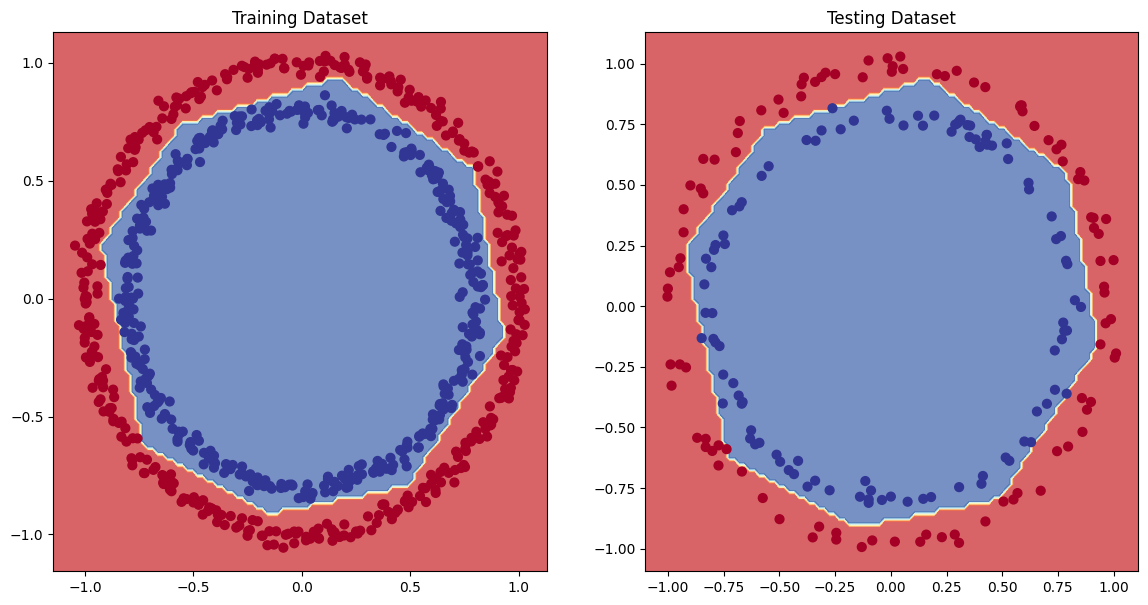

In [15]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.title("Training Dataset")
decision_boundray(model=model_circles_lr10e_2, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Testing Dataset")
decision_boundray(model=model_circles_lr10e_2, X=X_test, y=y_test)
plt.show()

![Tensorflow - Classification Problems](../assets/02_Tensorflow_Classifications_12.png)

### Finding the ideal learning rate

Comparing the learning progress of the previous two identical experiments - with a difference in learning rate `1e-3` vs `1e-2`

<AxesSubplot: title={'center': 'Learning Rate 1e-2'}>

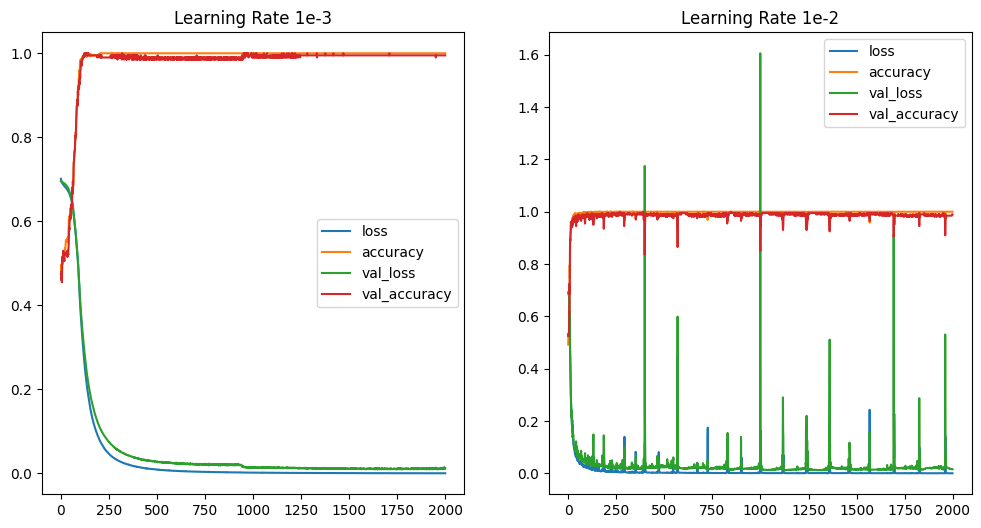

In [37]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
pd.DataFrame(history_lr10e_3.history).plot(ax=axes[0], title="Learning Rate 1e-3")
pd.DataFrame(history_lr10e_2.history).plot(ax=axes[1], title="Learning Rate 1e-2")
# with a larger learning rate the loss/accuracy improves much quicker
# but a larger learning rate also means that we get some overshots / fluctuations in performance

![Tensorflow - Classification Problems](../assets/02_Tensorflow_Classifications_13.png)

### Dynamically adjust the Learning Rate

We can use the Keras `LearningRateScheduler()` in a __Callback__ to update the learning rate of the used optimizer according to the schedule function with each new epoch.

In [47]:
# create a new model based on model_circles_lr10e_3
tf.random.set_seed(7)

model_circles_lr_callback = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu", name="input_layer"),
    tf.keras.layers.Dense(4, activation="relu", name="dense_layer"),
    tf.keras.layers.Dense(1, activation="sigmoid", name="output_layer")
])

model_circles_lr_callback.compile(loss="binary_crossentropy",
                                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                                 metrics=["accuracy"])

# introduce learning scheduler callback to increase the learning rate
# with every epoch by `0.0001 times 10e(epoch/100)`
learning_rate_callback = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/100))

history_lr_callback = model_circles_lr_callback.fit(X_train, y_train,
                                      validation_data=(X_test, y_test), epochs=500,
                                      callbacks=[learning_rate_callback], verbose=1)

# the learning rate, initially, increases sensibly. But later explodes leading to a terrible performance:
# Epoch 500/500
# 25/25 [==============================] - 0s 3ms/step - loss: 0.7646 - accuracy: 0.5025 - val_loss: 0.6961 - val_accuracy: 0.5000 - lr: 9.7724

Epoch 1/500
25/25 [==============================] - 1s 7ms/step - loss: 0.6906 - accuracy: 0.4913 - val_loss: 0.6901 - val_accuracy: 0.5350 - lr: 1.0000e-04
Epoch 2/500
25/25 [==============================] - 0s 3ms/step - loss: 0.6905 - accuracy: 0.4875 - val_loss: 0.6900 - val_accuracy: 0.5350 - lr: 1.0233e-04
Epoch 3/500
25/25 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.4837 - val_loss: 0.6900 - val_accuracy: 0.5350 - lr: 1.0471e-04
Epoch 4/500
25/25 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.4850 - val_loss: 0.6899 - val_accuracy: 0.5350 - lr: 1.0715e-04
Epoch 5/500
25/25 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.4850 - val_loss: 0.6898 - val_accuracy: 0.5300 - lr: 1.0965e-04
Epoch 6/500
25/25 [==============================] - 0s 3ms/step - loss: 0.6902 - accuracy: 0.4875 - val_loss: 0.6897 - val_accuracy: 0.5300 - lr: 1.1220e-04
Epoch 7/500
25/25 [==============================] -

Epoch 104/500
25/25 [==============================] - 0s 3ms/step - loss: 0.6358 - accuracy: 0.7100 - val_loss: 0.6404 - val_accuracy: 0.7050 - lr: 0.0011
Epoch 105/500
25/25 [==============================] - 0s 3ms/step - loss: 0.6330 - accuracy: 0.7150 - val_loss: 0.6372 - val_accuracy: 0.7050 - lr: 0.0011
Epoch 106/500
25/25 [==============================] - 0s 3ms/step - loss: 0.6297 - accuracy: 0.7300 - val_loss: 0.6332 - val_accuracy: 0.7250 - lr: 0.0011
Epoch 107/500
25/25 [==============================] - 0s 3ms/step - loss: 0.6260 - accuracy: 0.6850 - val_loss: 0.6268 - val_accuracy: 0.7050 - lr: 0.0011
Epoch 108/500
25/25 [==============================] - 0s 3ms/step - loss: 0.6194 - accuracy: 0.7325 - val_loss: 0.6208 - val_accuracy: 0.7500 - lr: 0.0012
Epoch 109/500
25/25 [==============================] - 0s 3ms/step - loss: 0.6147 - accuracy: 0.7825 - val_loss: 0.6160 - val_accuracy: 0.7700 - lr: 0.0012
Epoch 110/500
25/25 [==============================] - 0s 3ms/st

25/25 [==============================] - 0s 3ms/step - loss: 0.0452 - accuracy: 0.9862 - val_loss: 0.1077 - val_accuracy: 0.9700 - lr: 0.0117
Epoch 209/500
25/25 [==============================] - 0s 3ms/step - loss: 0.0381 - accuracy: 0.9887 - val_loss: 0.0800 - val_accuracy: 0.9600 - lr: 0.0120
Epoch 210/500
25/25 [==============================] - 0s 3ms/step - loss: 0.0420 - accuracy: 0.9850 - val_loss: 0.0861 - val_accuracy: 0.9700 - lr: 0.0123
Epoch 211/500
25/25 [==============================] - 0s 3ms/step - loss: 0.0397 - accuracy: 0.9900 - val_loss: 0.0800 - val_accuracy: 0.9700 - lr: 0.0126
Epoch 212/500
25/25 [==============================] - 0s 3ms/step - loss: 0.0438 - accuracy: 0.9862 - val_loss: 0.0794 - val_accuracy: 0.9750 - lr: 0.0129
Epoch 213/500
25/25 [==============================] - 0s 3ms/step - loss: 0.0295 - accuracy: 0.9887 - val_loss: 0.1234 - val_accuracy: 0.9550 - lr: 0.0132
Epoch 214/500
25/25 [==============================] - 0s 3ms/step - loss: 0.0

25/25 [==============================] - 0s 3ms/step - loss: 0.0755 - accuracy: 0.9725 - val_loss: 0.1500 - val_accuracy: 0.9250 - lr: 0.1288
Epoch 313/500
25/25 [==============================] - 0s 3ms/step - loss: 0.0352 - accuracy: 0.9875 - val_loss: 0.0901 - val_accuracy: 0.9800 - lr: 0.1318
Epoch 314/500
25/25 [==============================] - 0s 3ms/step - loss: 0.1161 - accuracy: 0.9588 - val_loss: 0.1078 - val_accuracy: 0.9400 - lr: 0.1349
Epoch 315/500
25/25 [==============================] - 0s 3ms/step - loss: 0.0851 - accuracy: 0.9675 - val_loss: 0.1070 - val_accuracy: 0.9550 - lr: 0.1380
Epoch 316/500
25/25 [==============================] - 0s 3ms/step - loss: 0.1713 - accuracy: 0.9425 - val_loss: 0.0715 - val_accuracy: 0.9800 - lr: 0.1413
Epoch 317/500
25/25 [==============================] - 0s 3ms/step - loss: 0.1983 - accuracy: 0.9262 - val_loss: 0.2009 - val_accuracy: 0.9000 - lr: 0.1445
Epoch 318/500
25/25 [==============================] - 0s 3ms/step - loss: 0.1

25/25 [==============================] - 0s 3ms/step - loss: 0.7129 - accuracy: 0.4775 - val_loss: 0.6932 - val_accuracy: 0.5000 - lr: 1.4125
Epoch 417/500
25/25 [==============================] - 0s 3ms/step - loss: 0.7269 - accuracy: 0.4875 - val_loss: 0.7169 - val_accuracy: 0.5000 - lr: 1.4454
Epoch 418/500
25/25 [==============================] - 0s 3ms/step - loss: 0.7061 - accuracy: 0.4975 - val_loss: 0.6949 - val_accuracy: 0.5000 - lr: 1.4791
Epoch 419/500
25/25 [==============================] - 0s 3ms/step - loss: 0.7435 - accuracy: 0.4825 - val_loss: 0.6999 - val_accuracy: 0.5000 - lr: 1.5136
Epoch 420/500
25/25 [==============================] - 0s 3ms/step - loss: 0.7164 - accuracy: 0.5000 - val_loss: 0.6935 - val_accuracy: 0.5000 - lr: 1.5488
Epoch 421/500
25/25 [==============================] - 0s 3ms/step - loss: 0.7053 - accuracy: 0.5200 - val_loss: 0.6938 - val_accuracy: 0.5000 - lr: 1.5849
Epoch 422/500
25/25 [==============================] - 0s 3ms/step - loss: 0.7

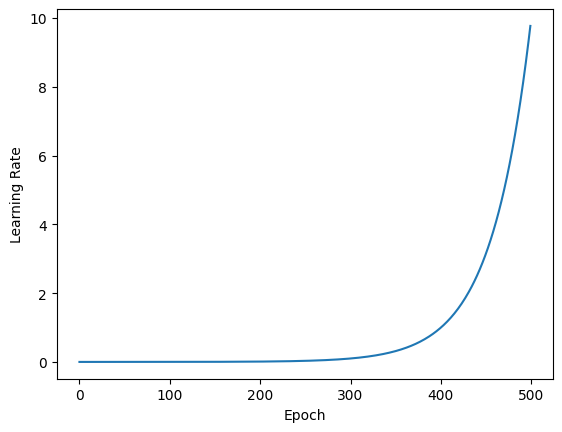

In [54]:
# plot the learning rate progression
lr = 1e-4 * (10 ** (tf.range(500)/100))
plt.plot(tf.range(500), lr)
plt.ylabel("Learning Rate")
plt.xlabel("Epoch")
plt.show()
# the adaptive learning rate stays reasonable up until the 300th epoch

![Tensorflow - Classification Problems](../assets/02_Tensorflow_Classifications_14.png)

<AxesSubplot: title={'center': 'Learning Rate Scheduler'}>

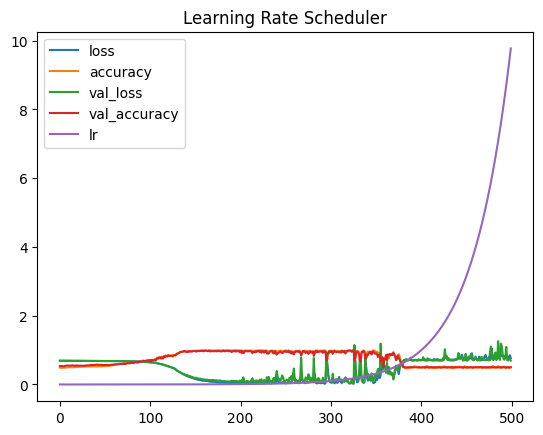

In [48]:
pd.DataFrame(history_lr_callback.history).plot(title="Learning Rate Scheduler")
# and the learning rate abve the 200th epoch leads to more and more fluctuations in loss and accuracy.

![Tensorflow - Classification Problems](../assets/02_Tensorflow_Classifications_15.png)

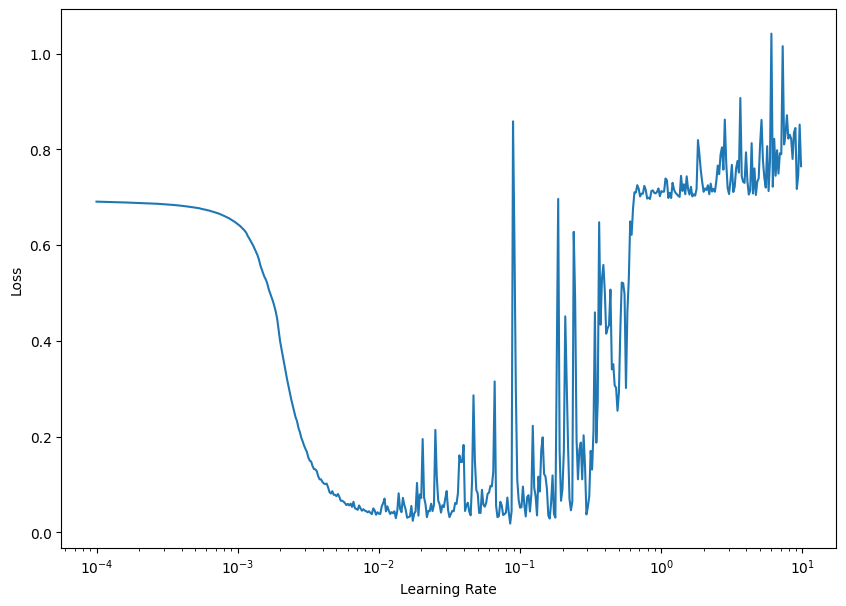

In [55]:
# the "ideal learning rate" is usally 10 times smaller than the value at the bottom of the loss curve (`loss = f(lr)`)
plt.figure(figsize=(10, 7))
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.semilogx(lr, history_lr_callback.history["loss"])
plt.show()
# for the plot below this would be around `3*10e-3` and `4*10e-3`

![Tensorflow - Classification Problems](../assets/02_Tensorflow_Classifications_16.png)

Epoch 1/500
25/25 [==============================] - 1s 8ms/step - loss: 0.6676 - accuracy: 0.5975 - val_loss: 0.6520 - val_accuracy: 0.7000
Epoch 2/500
25/25 [==============================] - 0s 3ms/step - loss: 0.6089 - accuracy: 0.6938 - val_loss: 0.6068 - val_accuracy: 0.6350
Epoch 3/500
25/25 [==============================] - 0s 3ms/step - loss: 0.5395 - accuracy: 0.7425 - val_loss: 0.5290 - val_accuracy: 0.7100
Epoch 4/500
25/25 [==============================] - 0s 3ms/step - loss: 0.4709 - accuracy: 0.7825 - val_loss: 0.4263 - val_accuracy: 0.8100
Epoch 5/500
25/25 [==============================] - 0s 3ms/step - loss: 0.2797 - accuracy: 0.9438 - val_loss: 0.2254 - val_accuracy: 0.9650
Epoch 6/500
25/25 [==============================] - 0s 3ms/step - loss: 0.1529 - accuracy: 0.9812 - val_loss: 0.1400 - val_accuracy: 0.9800
Epoch 7/500
25/25 [==============================] - 0s 3ms/step - loss: 0.1155 - accuracy: 0.9750 - val_loss: 0.1364 - val_accuracy: 0.9550
Epoch 8/500
2

Epoch 59/500
25/25 [==============================] - 0s 3ms/step - loss: 0.0081 - accuracy: 0.9975 - val_loss: 0.0341 - val_accuracy: 0.9950
Epoch 60/500
25/25 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0079 - val_accuracy: 1.0000
Epoch 61/500
25/25 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 0.9987 - val_loss: 0.0082 - val_accuracy: 1.0000
Epoch 62/500
25/25 [==============================] - 0s 3ms/step - loss: 0.0062 - accuracy: 0.9975 - val_loss: 0.0094 - val_accuracy: 0.9950
Epoch 63/500
25/25 [==============================] - 0s 3ms/step - loss: 0.0080 - accuracy: 0.9962 - val_loss: 0.0227 - val_accuracy: 0.9900
Epoch 64/500
25/25 [==============================] - 0s 3ms/step - loss: 0.0368 - accuracy: 0.9900 - val_loss: 0.0511 - val_accuracy: 0.9850
Epoch 65/500
25/25 [==============================] - 0s 3ms/step - loss: 0.0339 - accuracy: 0.9900 - val_loss: 0.0161 - val_accuracy: 0.9950
Epoch 

25/25 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 174/500
25/25 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 175/500
25/25 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 0.9987 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 176/500
25/25 [==============================] - 0s 3ms/step - loss: 6.5444e-04 - accuracy: 1.0000 - val_loss: 0.0085 - val_accuracy: 0.9950
Epoch 177/500
25/25 [==============================] - 0s 3ms/step - loss: 6.0522e-04 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 178/500
25/25 [==============================] - 0s 3ms/step - loss: 6.1632e-04 - accuracy: 1.0000 - val_loss: 0.0063 - val_accuracy: 1.0000
Epoch 179/500
25/25 [==============================] - 0s 3ms/step - loss: 4.2337e-04 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.00

Epoch 230/500
25/25 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0070 - val_accuracy: 0.9950
Epoch 231/500
25/25 [==============================] - 0s 3ms/step - loss: 5.5410e-04 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 0.9950
Epoch 232/500
25/25 [==============================] - 0s 3ms/step - loss: 3.7641e-04 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 233/500
25/25 [==============================] - 0s 3ms/step - loss: 3.7421e-04 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 234/500
25/25 [==============================] - 0s 3ms/step - loss: 3.3898e-04 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 235/500
25/25 [==============================] - 0s 3ms/step - loss: 3.4244e-04 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 236/500
25/25 [==============================] - 0s 4ms/step - loss: 3.2211e-04 - accuracy: 1.0000 - val_loss: 0.004

Epoch 342/500
25/25 [==============================] - 0s 3ms/step - loss: 1.6291e-04 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 343/500
25/25 [==============================] - 0s 3ms/step - loss: 1.7705e-04 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 344/500
25/25 [==============================] - 0s 3ms/step - loss: 1.7734e-04 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 345/500
25/25 [==============================] - 0s 4ms/step - loss: 2.1985e-04 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 346/500
25/25 [==============================] - 0s 3ms/step - loss: 1.8867e-04 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 347/500
25/25 [==============================] - 0s 3ms/step - loss: 1.5842e-04 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 348/500
25/25 [==============================] - 0s 3ms/step - loss: 1.6138e-04 - accuracy: 1.0000 - val_loss: 0

25/25 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 455/500
25/25 [==============================] - 0s 3ms/step - loss: 0.0418 - accuracy: 0.9850 - val_loss: 0.0906 - val_accuracy: 0.9650
Epoch 456/500
25/25 [==============================] - 0s 3ms/step - loss: 0.1265 - accuracy: 0.9613 - val_loss: 0.0952 - val_accuracy: 0.9750
Epoch 457/500
25/25 [==============================] - 0s 3ms/step - loss: 0.0132 - accuracy: 0.9975 - val_loss: 0.0083 - val_accuracy: 1.0000
Epoch 458/500
25/25 [==============================] - 0s 3ms/step - loss: 0.0066 - accuracy: 0.9975 - val_loss: 0.0373 - val_accuracy: 0.9850
Epoch 459/500
25/25 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 0.9975 - val_loss: 0.0072 - val_accuracy: 0.9950
Epoch 460/500
25/25 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0079 - val_accuracy: 0.9950
Epoch 461/500

<AxesSubplot: title={'center': 'Ideal Learning Rate'}>

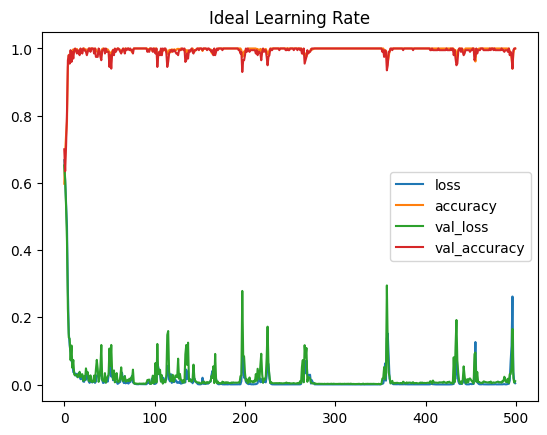

In [56]:
# re-run the model with the ideal learning rate
tf.random.set_seed(42)

model_circles_ideal_lr = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu", name="input_layer"),
    tf.keras.layers.Dense(4, activation="relu", name="dense_layer"),
    tf.keras.layers.Dense(1, activation="sigmoid", name="output_layer")
])

model_circles_ideal_lr.compile(loss="binary_crossentropy",
                                 optimizer=tf.keras.optimizers.Adam(learning_rate=4*10e-3),
                                 metrics=["accuracy"])

history_ideal_lr = model_circles_ideal_lr.fit(X_train, y_train,
                                      validation_data=(X_test, y_test),
                                      epochs=500, verbose=1)

# Epoch 500/500
# 25/25 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0100 - val_accuracy: 1.0000

313/313 [==============================] - 0s 854us/step


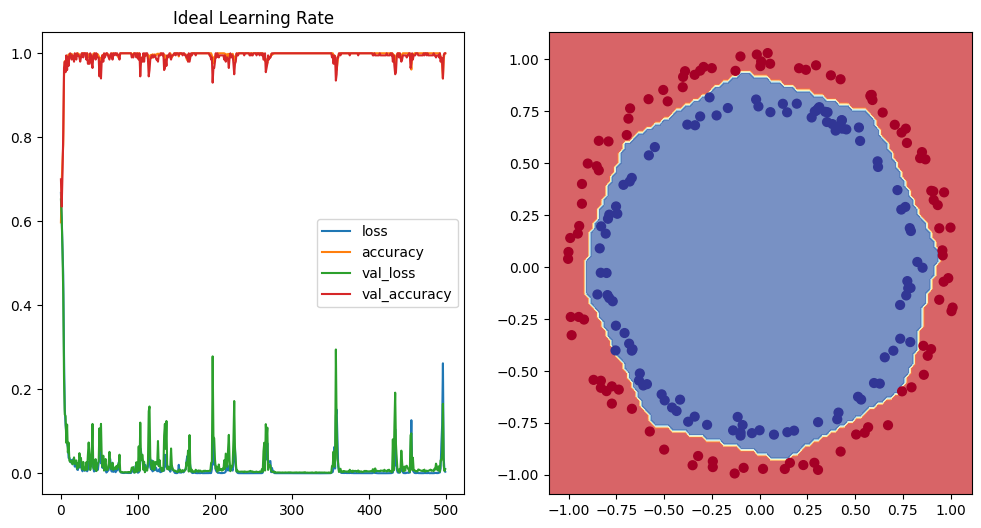

In [61]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
pd.DataFrame(history_ideal_lr.history).plot(ax=axes[0], title="Ideal Learning Rate")
decision_boundray(model=model_circles_ideal_lr, X=X_test, y=y_test)

![Tensorflow - Classification Problems](../assets/02_Tensorflow_Classifications_17.png)

## Confusion Matrix

So far I used __Accuracy__ as metric to evaluate the performance of a trained model. But accuracy can fall short of representing a dataset with imbalanced classes. If a class only makes up 1% of a dataset even if our model fails 100% of the time to predict the class we still end up with a high accuracy overall:

* _Accuracy = (tp + tn) / (tp + tn + fp + fn)_
  * `tf.keras.metrics.Accuracy()`, `sklearn.metrics.accuracy_score()`

A metric that allows us to indicate the amount of false positive predictions is __Precision__:

* _Precision = tp / (tp + fp)_
  * `tf.keras.metrics.Precision()`, `sklearn.metrics.precision_score()`

A metric to evaluate the amount of false negative predictions is __Recall__:

* _Recall = tp / (tp + fn)_
  * `tf.keras.metrics.Recall()`, `sklearn.metrics.recall_score()`

Depending on our problem we can use precision or recall instead of accuracy as the training performance metric. A metric that combines both recall and precision is the __F1 Score__ in SciKit_Learn:

* _F1-score = 2 * (precision * recall)/(precision + recall)_
  * `sklearn.metrics.f1_score()`
  
A good visual representation of a models performance is the __Confusion Matrix__ that compares predictions to the true value `sklearn.metrics.confusion_matrix()`.

In [66]:
# check loss and accuracy of the previous model
loss, accuracy = model_circles_ideal_lr.evaluate(X_test, y_test)
print(f"INFO :: Model loss - {loss:.5f}")
print(f"INFO :: Model accuracy - {(accuracy*100):.2f}%")
# 7/7 [==============================] - 0s 2ms/step - loss: 0.0100 - accuracy: 1.0000
# INFO :: Model loss - 0.01005
# INFO :: Model accuracy - 100.00%

7/7 [==============================] - 0s 2ms/step - loss: 0.0100 - accuracy: 1.0000
INFO :: Model loss - 0.01005
INFO :: Model accuracy - 100.00%


In [80]:
# confusion matrix
## get label predictions using the trained model
y_pred = model_circles_ideal_lr.predict(X_test)
# y_pred, y_test
# the predictions we get are floats while the true values are binary `1` or `0`
# round the prediction to be able to compare them:
y_pred_rnd = tf.round(y_pred)

7/7 [==============================] - 0s 1ms/step


In [81]:
confusion_matrix(y_pred_rnd, y_test)
# array([[100,   0],
#        [  0, 100]])

array([[100,   0],
       [  0, 100]])

In [96]:
# plot confusion matrix
import itertools

def plot_confusion_matrix(y_pred=y_pred_rnd, y_test=y_test):
        figsize = (10, 10)

        # create the confusion matrix
        cm = confusion_matrix(y_pred_rnd, y_test)

        # normalize
        cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        # cm_norm
        # array([[1., 0.],
        #        [0., 1.]])

        number_of_classes = cm.shape[0]
        # 2

        # plot matrix
        fig, ax = plt.subplots(figsize=figsize)
        cax = ax.matshow(cm, cmap=plt.cm.Greens)
        fig.colorbar(cax)

        # create classes
        classes = False

        if classes:
            labels = classes
        else:
            labels = np.arange(cm.shape[0])

        # axes lables
        ax.set(title="Confusion Matrix",
              xlabel="Prediction",
              ylabel="True",
              xticks=np.arange(number_of_classes),
              yticks=np.arange(number_of_classes),
              xticklabels=labels,
              yticklabels=labels)

        ax.xaxis.set_label_position("bottom")
        ax.title.set_size(20)
        ax.xaxis.label.set_size(20)
        ax.yaxis.label.set_size(20)
        ax.xaxis.tick_bottom()


        # colour threshold
        threshold = (cm.max() + cm.min()) / 2.

        # add text to cells
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i , f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=15)

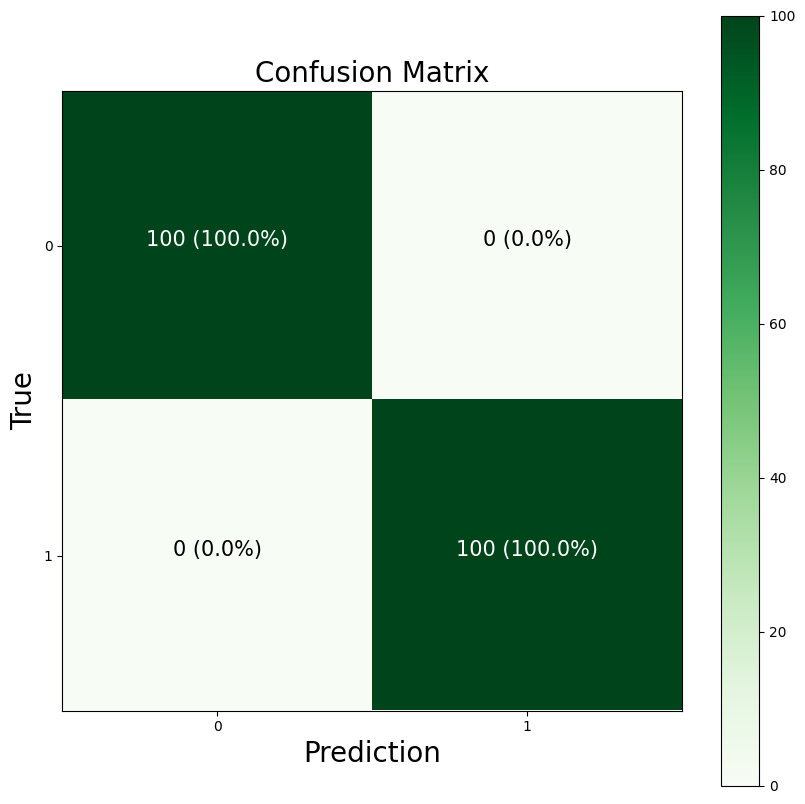

In [97]:
plot_confusion_matrix(y_pred, y_test)

![Tensorflow - Classification Problems](../assets/02_Tensorflow_Classifications_18.png)

# Multiclass Classifications

Working with the MNIST Fashion Dataset -> 60k images / 10 classes

In [7]:
# importing the mnist dataset with keras
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
train_data.shape, test_data.shape
# ((60000, 28, 28), (10000, 28, 28)) => 60k training images & 10k testing images with 28x28px

((60000, 28, 28), (10000, 28, 28))

Training Label:
Sneaker

Training Data:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   

Text(0.5, 1.0, 'Sneaker')

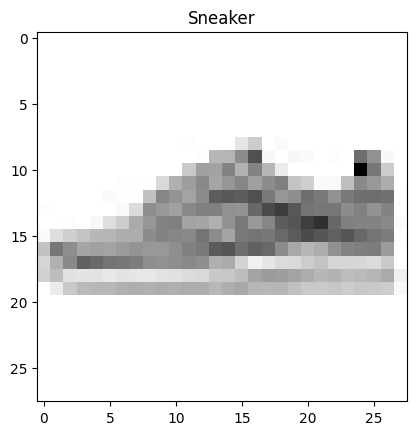

In [28]:
# show example data

## training labels
class_names = ["T-shirt/Top", "Trousers", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

## print label and data for index 666
print(f"Training Label:\n{class_names[train_labels[666]]}\n")
print(f"Training Data:\n{train_data[666]}")

plt.imshow(train_data[666], cmap=plt.cm.binary)
plt.title(class_names[train_labels[666]])

# Training Label:
# Sneaker

# Training Data:
# [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  0]
#  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  0]
#  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  0]
#  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  0]
#  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  0]
#  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  0]
#  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  0]
#  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  0]
#  [  0   0   0   0   0   0   0   0   0   0   0   2   0   0   0  25  51   0   5   0   0   0   0   0   0   0   0  0]
#  [  0   0   0   0   0   0   0   0   0   0   0   0   2  72  74 115 175   7   0   7   5   0   2   0 146 110   7  0]
#  [  0   0   0   0   0   0   0   0   0   0   0  54  95  92 123  77 123  72  20   0   0   0   0   0 255 136  51  0]
#  [  0   0   0   0   0   0   2   0   2  38  79  97 118  90 105 121  95 115  128  59  48   5   5  64 118 103  82 0]
#  [  0   0   0   0   0   5   2   0  61 121 108  92 115 162 167 162 175 133  105 113 144 133 110 133 144 146 141 2]
#  [  2   0   0   0   0   0   5  36 113 103  95 118 128 126 110 108 151 182  195 167 139 136 136 115 126 108 123 2]
#  [  0   0   2   0   7  33  51  85 105 123 128  92  90  79 108 133 103 121  162 170 193 206 151 126 123 123 118 5]
#  [  5  33  48  59  72  74  82  82 115 123 121 118 139 115  90 133 139 136  149 164 180 170 157 170 151 139 131 2]
#  [ 61 136 113  90  95  92 100 108 103 103 113 126 133 164 170 146 157 149  115  87  72  82 110 123 128 131 100 0]
#  [ 41  79 118 159 149 139 136 131 113 110 113 118 113  79  85  43  15  25  36  38  51  59  41  41  41  36  54  0]
#  [ 46  66  30  28  28  23  28  25  23  28  30  36  38  54  56  66  92 100  97  92  82  72  77  66  69  74  85 15]
#  [  0  20  54  69  72  72  79  82  79  82  79  82  82  72  82  87  74  72  74  64  54  54  56  51  56  54  51  7]
#  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  0   0   0   0   0   0   0   0   0   0]
#  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  0   0   0   0   0   0   0   0   0   0]
#  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  0   0   0   0   0   0   0   0   0   0]
#  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  0   0   0   0   0   0   0   0   0   0]
#  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  0   0   0   0   0   0   0   0   0   0]
#  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  0   0   0   0   0   0   0   0   0   0]
#  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  0   0   0   0   0   0   0   0   0   0]
#  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  0   0   0   0   0   0   0   0   0   0]]


![Tensorflow - Classification Problems](../assets/02_Tensorflow_Multi_Classifications_01.png)

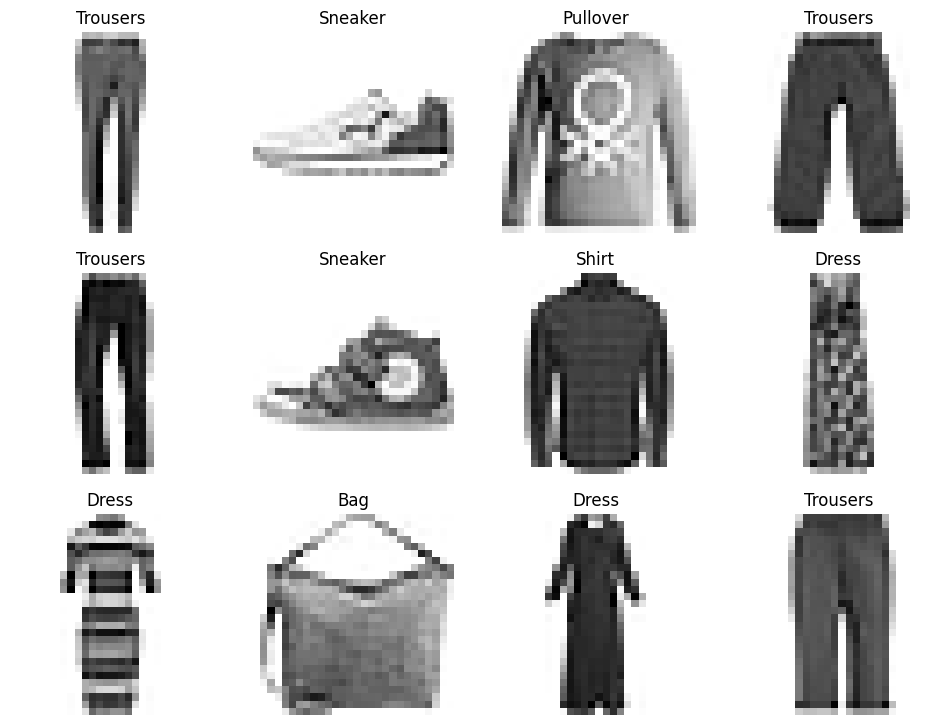

In [26]:
# plot multiple random images with labels
ran_gen = np.random.default_rng()

plt.figure(figsize=(12, 12))

for i in range(12):
    ax = plt.subplot(4, 4, i+1)
    random_index = ran_gen.integers(low=0, high=59999, size=1)
    plt.imshow(train_data[random_index[0]], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[random_index[0]]])
    plt.axis(False)

![Tensorflow - Classification Problems](../assets/02_Tensorflow_Multi_Classifications_02.png)

## Multiclass Classification Model

* __Input Shape__: Shape of the input image -> train_data[0].shape = `(28, 28)`
* __Output Shape__: Number of labels -> len(np.unique(train_labels)) = `10`
* __Loss Function__: `tf.keras.losses.CategoricalCrossentropy`
* __Output Layer Activation__: `softmax`

In [32]:
# determin the input and output shape
train_data[0].shape, len(np.unique(train_labels))
# ((28, 28), 10)

((28, 28), 10)

In [59]:
# building the model - 1st attempt
tf.random.set_seed(42)

model_multiclass = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu", name="input_layer"),
    tf.keras.layers.Dense(4, activation="relu", name="dense_layer1"),
    tf.keras.layers.Dense(10, activation="softmax", name="output_layer")
])
                          
model_multiclass.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                        metrics="accuracy")
                          
history_multi = model_multiclass.fit(train_data, train_labels, batch_size=32,
                    validation_data=(test_data, test_labels),
                    epochs=100, verbose=1)

# ValueError: Shapes (32,) and (32, 28, 10) are incompatible
# => input data needs to be flattened

Epoch 1/100


ValueError: in user code:

    File "/usr/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "/usr/lib/python3.10/site-packages/keras/engine/training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/lib/python3.10/site-packages/keras/engine/training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "/usr/lib/python3.10/site-packages/keras/engine/training.py", line 1024, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/lib/python3.10/site-packages/keras/engine/training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "/usr/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/lib/python3.10/site-packages/keras/losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/lib/python3.10/site-packages/keras/losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/lib/python3.10/site-packages/keras/losses.py", line 2004, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/usr/lib/python3.10/site-packages/keras/backend.py", line 5532, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (32,) and (32, 28, 10) are incompatible


In [60]:
# building the model - 2nd attempt
tf.random.set_seed(42)

model_multiclass = tf.keras.Sequential([
    # flatten data from `28*28` to `None, 784`
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu", name="input_layer"),
    tf.keras.layers.Dense(4, activation="relu", name="dense_layer1"),
    tf.keras.layers.Dense(10, activation="softmax", name="output_layer")
])
                          
model_multiclass.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                        metrics="accuracy")
                          
history_multi = model_multiclass.fit(train_data, train_labels, batch_size=32,
                    validation_data=(test_data, test_labels),
                    epochs=100, verbose=1)

# ValueError: Shapes (32, 1) and (32, 10) are incompatible
# => CategoricalCrossentropy() expects labels to be OneHot encoded
# use SparseCategoricalCrossentropy() instead

Epoch 1/100


ValueError: in user code:

    File "/usr/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "/usr/lib/python3.10/site-packages/keras/engine/training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/lib/python3.10/site-packages/keras/engine/training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "/usr/lib/python3.10/site-packages/keras/engine/training.py", line 1024, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/lib/python3.10/site-packages/keras/engine/training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "/usr/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/lib/python3.10/site-packages/keras/losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/lib/python3.10/site-packages/keras/losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/lib/python3.10/site-packages/keras/losses.py", line 2004, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/usr/lib/python3.10/site-packages/keras/backend.py", line 5532, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (32, 1) and (32, 10) are incompatible


> Use `SparseCategoricalCrossentropy()` for "regular" labels

In [61]:
# building the model - 3rd attempt
tf.random.set_seed(42)

model_multiclass = tf.keras.Sequential([
    # flatten data from `28*28` to `None, 784`
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu", name="input_layer"),
    tf.keras.layers.Dense(4, activation="relu", name="dense_layer1"),
    tf.keras.layers.Dense(10, activation="softmax", name="output_layer")
])
                          
model_multiclass.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                        metrics="accuracy")
                          
history_multi = model_multiclass.fit(train_data, train_labels, batch_size=32,
                    validation_data=(test_data, test_labels),
                    epochs=100, verbose=1)

# Epoch 100/100
# 1875/1875 [==============================] - 4s 2ms/step - loss: 0.8026 - accuracy: 0.6657 - val_loss: 0.9066 - val_accuracy: 0.6479

Epoch 1/100


2023-03-02 14:35:36.521467: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x563e4fb99320 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-03-02 14:35:36.521496: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce GTX 1060 6GB, Compute Capability 6.1
2023-03-02 14:35:36.566014: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-03-02 14:35:36.579498: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2023-03-02 14:35:36.943785: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 [==============================] - 7s 2ms/step - loss: 2.4600 - accuracy: 0.1130 - val_loss: 2.1993 - val_accuracy: 0.1500
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1259 - accuracy: 0.1798 - val_loss: 2.0755 - val_accuracy: 0.1920
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 2.0166 - accuracy: 0.2016 - val_loss: 1.9560 - val_accuracy: 0.2097
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9224 - accuracy: 0.1913 - val_loss: 1.9111 - val_accuracy: 0.1858
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.8720 - accuracy: 0.2075 - val_loss: 1.8196 - val_accuracy: 0.2639
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7609 - accuracy: 0.2772 - val_loss: 1.7638 - val_accuracy: 0.2877
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7196 - accuracy: 0.2878 - val_loss: 1.7269 - val_accuracy: 0.29

1875/1875 [==============================] - 4s 2ms/step - loss: 0.9602 - accuracy: 0.5876 - val_loss: 1.0516 - val_accuracy: 0.5809
Epoch 58/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9575 - accuracy: 0.5895 - val_loss: 1.0268 - val_accuracy: 0.5734
Epoch 59/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9543 - accuracy: 0.5899 - val_loss: 1.0299 - val_accuracy: 0.5717
Epoch 60/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9524 - accuracy: 0.5890 - val_loss: 1.0258 - val_accuracy: 0.5654
Epoch 61/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9504 - accuracy: 0.5917 - val_loss: 1.0229 - val_accuracy: 0.5837
Epoch 62/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9473 - accuracy: 0.5925 - val_loss: 1.0203 - val_accuracy: 0.5844
Epoch 63/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9452 - accuracy: 0.5911 - val_loss: 1.0209 - val_accuracy

> Use `CategoricalCrossentropy()` for OneHot encoded labels

In [67]:
# building the model - with OneHot encoded labels (alternative)
## OneHot encode labels
train_labels_hot = tf.one_hot(train_labels, depth=10)
test_labels_hot = tf.one_hot(test_labels, depth=10)

## re-run model with CategoricalCrossentropy() and ecoded labels
tf.random.set_seed(42)

model_multiclass_OneHot = tf.keras.Sequential([
    # flatten data from `28*28` to `None, 784`
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu", name="input_layer"),
    tf.keras.layers.Dense(4, activation="relu", name="dense_layer1"),
    tf.keras.layers.Dense(10, activation="softmax", name="output_layer")
])
                          
model_multiclass_OneHot.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                        metrics="accuracy")
                          
history_multi_OneHot = model_multiclass_OneHot.fit(train_data, train_labels_hot, batch_size=32,
                    validation_data=(test_data, test_labels_hot),
                    epochs=100, verbose=1)

# Epoch 100/100
# 1875/1875 [==============================] - 4s 2ms/step - loss: 1.3885 - accuracy: 0.3996 - val_loss: 1.4322 - val_accuracy: 0.4055

Epoch 1/100
1875/1875 [==============================] - 5s 2ms/step - loss: 4.7102 - accuracy: 0.0957 - val_loss: 2.3351 - val_accuracy: 0.0972
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3187 - accuracy: 0.0984 - val_loss: 2.3118 - val_accuracy: 0.1001
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3072 - accuracy: 0.0993 - val_loss: 2.3080 - val_accuracy: 0.0998
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3039 - accuracy: 0.0976 - val_loss: 2.3050 - val_accuracy: 0.1000
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0976 - val_loss: 2.3033 - val_accuracy: 0.1000
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3018 - accuracy: 0.0997 - val_loss: 2.3021 - val_accuracy: 0.1011
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2681 - accuracy: 0.1173 - val_loss: 2.2341 - val_ac

1875/1875 [==============================] - 4s 2ms/step - loss: 1.4287 - accuracy: 0.3936 - val_loss: 1.4665 - val_accuracy: 0.3968
Epoch 58/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4278 - accuracy: 0.3948 - val_loss: 1.4650 - val_accuracy: 0.3689
Epoch 59/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4257 - accuracy: 0.3953 - val_loss: 1.4700 - val_accuracy: 0.3727
Epoch 60/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4238 - accuracy: 0.3960 - val_loss: 1.4626 - val_accuracy: 0.4027
Epoch 61/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4219 - accuracy: 0.3965 - val_loss: 1.4567 - val_accuracy: 0.3976
Epoch 62/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4210 - accuracy: 0.3946 - val_loss: 1.4504 - val_accuracy: 0.4105
Epoch 63/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4184 - accuracy: 0.3931 - val_loss: 1.4520 - val_accuracy